In [112]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Key Question : How does the demographic and the income level of the people affect the preference and acceptance of self-driving cars? 

## Part 1： Cleaning

In [113]:
#Read raw file
drive_selfcar_df=pd.read_csv('https://raw.githubusercontent.com/EvaW01/schulich_ai_fundamentals/main/MMAI_Fundamental_Assignment.csv')

drive_selfcar_df.head()


,Unnamed: 0,Question_key,Interview_start_time,Interview_end_time,Device_Type,Language,Form_No,Tablet_category,Read_about_SelfDrive_Car,Widespread_use_SelfDrive_Car,...,People_Political_Party,People_Political_Type,People_Political_Type_Category,Income_Level,Vote_Registered_Adress,Ideology,Interaction_Frequency,Volume_Sum,Income_Class,Weight_99_Percent
0,0,100260.0,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314.0,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,A little,Not sure,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363.0,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,A little,Good idea for society,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598.0,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637.0,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [114]:
#drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(lambda x: '50000 - 60000' if x == '$50,000 to less than $60,000')

drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '50000 - 60000' if str(x).lower() == '$50,000 to less than $60,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '40000 - 50000' if str(x).lower() == '$40,000 to less than $50,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '100000' if str(x).lower() == '$100,000 or more'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '30000 - 40000' if str(x).lower() == '$30,000 to less than $40,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '30000' if str(x).lower() == 'Less than $30,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '70000 - 80000' if str(x).lower() == '$70,000 to less than $80,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '80000 - 90000' if str(x).lower() == '$80,000 to less than $90,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '90000 - 100000' if str(x).lower() == '$90,000 to less than $100,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '60000 - 70000' if str(x).lower() == '$60,000 to less than $70,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: 0 if str(x).lower() == 'Refused'.lower() else x)

drive_selfcar_df['Income_Level'].unique()

array(['50000 - 60000', '40000 - 50000', '100000', '30000 - 40000',
       '30000', '70000 - 80000', 0, '80000 - 90000', '90000 - 100000',
       '60000 - 70000'], dtype=object)

In [115]:
drive_selfcar_df = drive_selfcar_df.drop(['Form_No', 'Tablet_category', 'Hispanic', 'Hispanic_Origin', 'Religion', 'Birth_Religion',
       'Religion_Category', 'Religion_Attend_Place', 'Religion_Importance',
       'Religion_Prayer', 'People_Political', 'People_Political_Party',
       'People_Political_Type', 'People_Political_Type_Category'], axis=1)

drive_selfcar_df

,Unnamed: 0,Question_key,Interview_start_time,Interview_end_time,Device_Type,Language,Read_about_SelfDrive_Car,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseA,...,Citizen,Birthplace,Marital_Status,Income_Level,Vote_Registered_Adress,Ideology,Interaction_Frequency,Volume_Sum,Income_Class,Weight_99_Percent
0,0,1.002600e+05,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Never been married,50000 - 60000,You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,1.003140e+05,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,A little,Not sure,Probably NOT want,Probably would happen,...,Yes,"U.S. – 50 states, District of Columbia",Divorced,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,1.003630e+05,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,A little,Good idea for society,Probably want,Definitely would happen,...,Yes,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,1.005980e+05,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,1.006370e+05,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,30000 - 40000,You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,10255,2.021010e+11,2021-11-02 15:06:47,2021-11-02 15:21:18,Smartphone,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,30000,You are NOT registered to vote at your current...,Moderate,Almost constantly,No,Lower income,0.425901
10256,10256,2.021010e+11,2021-11-02 12:18:58,2021-11-02 12:32:49,Smartphone,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Upper income,0.157638
10257,10257,2.021010e+11,2021-11-04 16:30:29,2021-11-06 11:08:56,Smartphone,English,A lot,Good idea for society,Definitely want,Definitely would happen,...,Yes,"U.S. – 50 states, District of Columbia",Living with a partner,30000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Almost constantly,Yes,Lower income,0.282079
10258,10258,2.021010e+11,2021-11-06 15:22:13,2021-11-06 16:10:36,Laptop/PC,English,A little,Good idea for society,Definitely want,Definitely would happen,...,Yes,"U.S. – 50 states, District of Columbia",Married,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,0.441525


In [116]:
drive_selfcar_df.dropna(inplace = True)

In [117]:
#'A man', 'A woman', 'In some other way', 'Refused'

drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Man' if str(x).lower() == 'A man'.lower() else x)
drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Woman' if str(x).lower() == 'A woman'.lower() else x)
drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Other' if str(x).lower() == 'In some other way'.lower() else x)
drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Other' if str(x).lower() == 'Refused'.lower() else x)

drive_selfcar_df['Gender'].unique()

array(['Man', 'Woman', 'Other'], dtype=object)

In [118]:
drive_selfcar_df['Age'] = drive_selfcar_df['Age'].apply(
    lambda x: 0 if str(x).lower() == 'Refused'.lower() else x)
drive_selfcar_df['Age'].unique()

array(['65+', '30-49', '50-64', '18-29', 0], dtype=object)

In [119]:
def society_income_influence(row):
    if row['Widespread_use_SelfDrive_Car'] == 'Good idea for society' and row['Accident_SelfDrive_Car'] == 'Increase the number of people killed or injured in traffic accidents':
        return 'Contrary Opinion'
    elif row['Widespread_use_SelfDrive_Car'] == 'Good idea for society' and row['Accident_SelfDrive_Car'] == 'Decrease the number of people killed or injured in traffic accidents':
        return 'Similar Opinion'
    elif row['Widespread_use_SelfDrive_Car'] == 'Bad idea for society' and row['Accident_SelfDrive_Car'] == 'Increase the number of people killed or injured in traffic accidents':
        return 'Similar Opinion'
    elif row['Widespread_use_SelfDrive_Car'] == 'Bad idea for society' and row['Accident_SelfDrive_Car'] == 'Decrease the number of people killed or injured in traffic accidents':
        return 'Contrary Opinion'
    else:
        return 'No Popular Opinion'

drive_selfcar_df['Preference_basedon_accident'] = drive_selfcar_df.apply(society_income_influence, axis=1)
drive_selfcar_df

,Unnamed: 0,Question_key,Interview_start_time,Interview_end_time,Device_Type,Language,Read_about_SelfDrive_Car,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseA,...,Birthplace,Marital_Status,Income_Level,Vote_Registered_Adress,Ideology,Interaction_Frequency,Volume_Sum,Income_Class,Weight_99_Percent,Preference_basedon_accident
1,1,1.003140e+05,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,A little,Not sure,Probably NOT want,Probably would happen,...,"U.S. – 50 states, District of Columbia",Divorced,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090,No Popular Opinion
2,2,1.003630e+05,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,A little,Good idea for society,Probably want,Definitely would happen,...,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579,Similar Opinion
5,5,1.008030e+05,2021-11-03 19:22:44,2021-11-03 19:41:04,Laptop/PC,English,A little,Bad idea for society,Definitely NOT want,Probably would NOT happen,...,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a week,Yes,Upper income,0.302004,Similar Opinion
6,6,1.012240e+05,2021-11-03 18:18:21,2021-11-03 18:33:41,Smartphone,English,A little,Bad idea for society,Probably NOT want,Probably would NOT happen,...,"U.S. – 50 states, District of Columbia",Married,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Conservative,About once a day,Yes,Middle income,0.287719,No Popular Opinion
8,8,1.014850e+05,2021-11-02 19:22:24,2021-11-02 19:35:23,Smartphone,English,A little,Bad idea for society,Probably NOT want,Probably would NOT happen,...,"U.S. – 50 states, District of Columbia",Widowed,100000,You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Almost constantly,Yes,Upper income,0.276541,Similar Opinion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,10252,2.021010e+11,2021-11-03 18:50:06,2021-11-03 19:02:32,Laptop/PC,English,A little,Bad idea for society,Probably NOT want,Probably would happen,...,Another country,Married,30000,You are NOT registered to vote at your current...,Moderate,Almost constantly,Yes,Lower income,1.230882,Similar Opinion
10253,10253,2.021010e+11,2021-11-02 14:27:17,2021-11-02 15:01:43,Smartphone,English,A lot,Not sure,Definitely NOT want,Probably would happen,...,"U.S. – 50 states, District of Columbia",Married,50000 - 60000,You are NOT registered to vote at your current...,Refused,Several times a week,No,Middle income,8.524234,No Popular Opinion
10257,10257,2.021010e+11,2021-11-04 16:30:29,2021-11-06 11:08:56,Smartphone,English,A lot,Good idea for society,Definitely want,Definitely would happen,...,"U.S. – 50 states, District of Columbia",Living with a partner,30000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Almost constantly,Yes,Lower income,0.282079,Contrary Opinion
10258,10258,2.021010e+11,2021-11-06 15:22:13,2021-11-06 16:10:36,Laptop/PC,English,A little,Good idea for society,Definitely want,Definitely would happen,...,"U.S. – 50 states, District of Columbia",Married,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,0.441525,Similar Opinion


## Part2: EDA

In [120]:
drive_selfcar_df.columns

Index(['Unnamed: 0', 'Question_key', 'Interview_start_time',
       'Interview_end_time', 'Device_Type', 'Language',
       'Read_about_SelfDrive_Car', 'Widespread_use_SelfDrive_Car',
       'Choice_drive_SelfDrive_Car', 'Passenger_SelfDrive_Car_CaseA',
       'Passenger_SelfDrive_Car_CaseB', 'Passenger_SelfDrive_Car_CaseC',
       'Passenger_SelfDrive_Car_CaseD', 'Income_class_SelfDrive_Car',
       'Accident_SelfDrive_Car', 'UnnAccident_SelfDrive_Car',
       'Group_role_SelfDrive_Car_CaseA', 'Group_role_SelfDrive_Car_CaseB',
       'Group_role_SelfDrive_Car_CaseC', 'Group_role_SelfDrive_Car_CaseD',
       'Concern_SelfDrive_Car', 'Safety_SelfDrive_Car',
       'Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD', 'Share_road_SelfDriveCar',
       'Purpose_SelfDriveCar_CaseA', 'Purpose_SelfDriveCar_CaseB',
       'Purpose_SelfDriveCar_CaseC', 'Pur

In [121]:
drive_selfcar_df['Accpt_circumstances_SelfDrive_Car_CaseA'].unique()

array(['More acceptable', 'No difference', 'Less acceptable', 'Refused'],
      dtype=object)

In [122]:
drive_selfcar_df['Ideology'].unique()

array(['Liberal', 'Moderate', 'Conservative', 'Very conservative',
       'Very liberal', 'Refused'], dtype=object)

In [123]:
drive_selfcar_df['Preference_basedon_accident'].unique()

array(['No Popular Opinion', 'Similar Opinion', 'Contrary Opinion'],
      dtype=object)

In [124]:
input_variables = ['Widespread_use_SelfDrive_Car',
       'Choice_drive_SelfDrive_Car',
       'Passenger_SelfDrive_Car_CaseB', 'Passenger_SelfDrive_Car_CaseC',
       'Accident_SelfDrive_Car', 
       'Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD', 
       'Share_road_SelfDriveCar',
       'Purpose_SelfDriveCar_CaseA', 
       'Purpose_SelfDriveCar_CaseC',
       'Demographic_Region', 'Age', 'Gender', 'Education_Degree',
       'Ethnicity', 
       'Income_Level','Ideology']

In [125]:
selfvcar_inpt_df = drive_selfcar_df[input_variables]

In [126]:
selfvcar_inpt_df.head(10)

,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseB,Passenger_SelfDrive_Car_CaseC,Accident_SelfDrive_Car,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD,Share_road_SelfDriveCar,Purpose_SelfDriveCar_CaseA,Purpose_SelfDriveCar_CaseC,Demographic_Region,Age,Gender,Education_Degree,Ethnicity,Income_Level,Ideology
1,Not sure,Probably NOT want,Probably would happen,Probably would NOT happen,Increase the number of people killed or injure...,More acceptable,More acceptable,No difference,More acceptable,Somewhat comfortable,Not sure,Favor,East North Central,65+,Man,"Some college, no degree",White non-Hispanic,40000 - 50000,Liberal
2,Good idea for society,Probably want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Very comfortable,Favor,Favor,Middle Atlantic,30-49,Woman,Postgraduate,White non-Hispanic,100000,Moderate
5,Bad idea for society,Definitely NOT want,Definitely would happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,More acceptable,Not too comfortable,Favor,Oppose,West North Central,65+,Woman,College graduate/some post grad,White non-Hispanic,100000,Conservative
6,Bad idea for society,Probably NOT want,Probably would happen,Probably would NOT happen,Not make much difference,More acceptable,More acceptable,No difference,More acceptable,Not too comfortable,Oppose,Oppose,South Atlantic,65+,Man,"Some college, no degree",White non-Hispanic,40000 - 50000,Conservative
8,Bad idea for society,Probably NOT want,Probably would NOT happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,No difference,Not too comfortable,Oppose,Oppose,Mountain,50-64,Woman,"Some college, no degree",Asian non-Hispanic,100000,Conservative
10,Good idea for society,Probably want,Probably would happen,Probably would NOT happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,No difference,Very comfortable,Not sure,Not sure,Middle Atlantic,18-29,Woman,College graduate/some post grad,White non-Hispanic,100000,Conservative
11,Good idea for society,Definitely want,Probably would NOT happen,Definitely would happen,Decrease the number of people killed or injure...,More acceptable,No difference,More acceptable,More acceptable,Very comfortable,Favor,Not sure,South Atlantic,65+,Woman,Associate's degree,White non-Hispanic,0,Liberal
13,Good idea for society,Probably want,Probably would happen,Probably would happen,Decrease the number of people killed or injure...,No difference,More acceptable,More acceptable,No difference,Somewhat comfortable,Favor,Favor,South Atlantic,30-49,Woman,Postgraduate,White non-Hispanic,80000 - 90000,Liberal
15,Bad idea for society,Definitely NOT want,Probably would NOT happen,Probably would NOT happen,Refused,More acceptable,More acceptable,Less acceptable,More acceptable,Not too comfortable,Oppose,Oppose,Mountain,65+,Man,College graduate/some post grad,White non-Hispanic,100000,Moderate
16,Not sure,Probably NOT want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Somewhat comfortable,Not sure,Oppose,Middle Atlantic,65+,Woman,Postgraduate,White non-Hispanic,30000,Moderate


In [127]:
selfvcar_inpt_df.columns

Index(['Widespread_use_SelfDrive_Car', 'Choice_drive_SelfDrive_Car',
       'Passenger_SelfDrive_Car_CaseB', 'Passenger_SelfDrive_Car_CaseC',
       'Accident_SelfDrive_Car', 'Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD', 'Share_road_SelfDriveCar',
       'Purpose_SelfDriveCar_CaseA', 'Purpose_SelfDriveCar_CaseC',
       'Demographic_Region', 'Age', 'Gender', 'Education_Degree', 'Ethnicity',
       'Income_Level', 'Ideology'],
      dtype='object')

In [128]:
selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseA'].unique()

array(['More acceptable', 'No difference', 'Less acceptable', 'Refused'],
      dtype=object)

In [129]:
selfvcar_inpt_df[['Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD']]

,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD
1,More acceptable,More acceptable,No difference,More acceptable
2,More acceptable,More acceptable,More acceptable,More acceptable
5,More acceptable,No difference,More acceptable,More acceptable
6,More acceptable,More acceptable,No difference,More acceptable
8,More acceptable,No difference,More acceptable,No difference
...,...,...,...,...
10252,No difference,More acceptable,No difference,More acceptable
10253,More acceptable,More acceptable,More acceptable,More acceptable
10257,More acceptable,More acceptable,More acceptable,More acceptable
10258,More acceptable,More acceptable,No difference,No difference


In [130]:
# Mapping Values to input variables

widespread_use_mapping = {
    'Good idea for society': 5,
    'Bad idea for society': 1,
    'Not sure': 3,
    'Refused': 0
}

choice_drive_mapping = {
    'Definitely NOT want': 1,
    'Probably NOT want': 2,
    'Probably want': 4,
    'Definitely want': 5,
    'Refused': 0
}

passenger_caseb_mapping = {
    'Definitely would happen': 1,
    'Probably would happen': 2,
    'Probably would NOT happen': 4,
    'Definitely would NOT happen': 5,
    'Refused': 0
}

passenger_casec_mapping = {
    'Definitely would happen': 5,
    'Probably would happen': 4,
    'Probably would NOT happen': 2,
    'Definitely would NOT happen': 1,
    'Refused': 0
}

accident_mapping = {
    'Increase the number of people killed or injured in traffic accidents': 1,
    'Decrease the number of people killed or injured in traffic accidents': 5,
    'Not make much difference': 3,
    'Refused': 0
}

share_road_mapping = {
    'Extremely comfortable': 5,
    'Very comfortable': 4,
    'Somewhat comfortable': 3,
    'Not too comfortable': 2,
    'Not comfortable at all': 1,
    'Refused': 0
}

purpose_casea_mapping = {
    'Favor': 5,
    'Oppose': 1,
    'Not sure': 3,
    'Refused': 0
}

purpose_casea_mapping = {
    'Favor': 5,
    'Oppose': 1,
    'Not sure': 3,
    'Refused': 0
}

purpose_casec_mapping = {
    'Favor': 5,
    'Oppose': 1,
    'Not sure': 3,
    'Refused': 0
}

accpt_circumstances_mapping = {
    'More acceptable': 1,
    'Less acceptable': 0,
    'No difference': 0.5,
    'Refused' : 0
}

selfvcar_inpt_df['Widespread_use_SelfDrive_Car_Score'] = selfvcar_inpt_df['Widespread_use_SelfDrive_Car'].map(widespread_use_mapping)
selfvcar_inpt_df['Choice_drive_SelfDrive_Car_Score'] = selfvcar_inpt_df['Choice_drive_SelfDrive_Car'].map(choice_drive_mapping)
selfvcar_inpt_df['Passenger_SelfDrive_Car_CaseB_Score'] = selfvcar_inpt_df['Passenger_SelfDrive_Car_CaseB'].map(passenger_caseb_mapping)
selfvcar_inpt_df['Passenger_SelfDrive_Car_CaseC_Score'] = selfvcar_inpt_df['Passenger_SelfDrive_Car_CaseC'].map(passenger_casec_mapping)
selfvcar_inpt_df['Accident_SelfDrive_Car_Score'] = selfvcar_inpt_df['Accident_SelfDrive_Car'].map(accident_mapping)
selfvcar_inpt_df['Share_road_SelfDriveCar_Score'] = selfvcar_inpt_df['Share_road_SelfDriveCar'].map(share_road_mapping)
selfvcar_inpt_df['Purpose_SelfDriveCar_CaseA_Score'] = selfvcar_inpt_df['Purpose_SelfDriveCar_CaseA'].map(purpose_casea_mapping)
selfvcar_inpt_df['Purpose_SelfDriveCar_CaseC_Score'] = selfvcar_inpt_df['Purpose_SelfDriveCar_CaseC'].map(purpose_casea_mapping)


selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseA_Score'] = selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseA'].map(accpt_circumstances_mapping)
selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseB_Score'] = selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseB'].map(accpt_circumstances_mapping)
selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseC_Score'] = selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseC'].map(accpt_circumstances_mapping)
selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseD_Score'] = selfvcar_inpt_df['Accpt_circumstances_SelfDrive_Car_CaseD'].map(accpt_circumstances_mapping)

selfvcar_inpt_df

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_51449/1714227203.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selfvcar_inpt_df['Widespread_use_SelfDrive_Car_Score'] = selfvcar_inpt_df['Widespread_use_SelfDrive_Car'].map(widespread_use_mapping)
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_51449/1714227203.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selfvcar_inpt_df['Choice_drive_SelfDrive_Car_Score'] = selfvcar_inpt_df['Choice_drive_SelfDrive_Car'].map(choice_drive_m

,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseB,Passenger_SelfDrive_Car_CaseC,Accident_SelfDrive_Car,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD,Share_road_SelfDriveCar,...,Passenger_SelfDrive_Car_CaseB_Score,Passenger_SelfDrive_Car_CaseC_Score,Accident_SelfDrive_Car_Score,Share_road_SelfDriveCar_Score,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score
1,Not sure,Probably NOT want,Probably would happen,Probably would NOT happen,Increase the number of people killed or injure...,More acceptable,More acceptable,No difference,More acceptable,Somewhat comfortable,...,2,2,1,3,3,5,1.0,1.0,0.5,1.0
2,Good idea for society,Probably want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Very comfortable,...,1,4,5,4,5,5,1.0,1.0,1.0,1.0
5,Bad idea for society,Definitely NOT want,Definitely would happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,More acceptable,Not too comfortable,...,1,1,1,2,5,1,1.0,0.5,1.0,1.0
6,Bad idea for society,Probably NOT want,Probably would happen,Probably would NOT happen,Not make much difference,More acceptable,More acceptable,No difference,More acceptable,Not too comfortable,...,2,2,3,2,1,1,1.0,1.0,0.5,1.0
8,Bad idea for society,Probably NOT want,Probably would NOT happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,No difference,Not too comfortable,...,4,1,1,2,1,1,1.0,0.5,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,Bad idea for society,Probably NOT want,Definitely would happen,Probably would NOT happen,Increase the number of people killed or injure...,No difference,More acceptable,No difference,More acceptable,Somewhat comfortable,...,1,2,1,3,1,1,0.5,1.0,0.5,1.0
10253,Not sure,Definitely NOT want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Not too comfortable,...,1,4,5,2,3,5,1.0,1.0,1.0,1.0
10257,Good idea for society,Definitely want,Definitely would happen,Definitely would happen,Increase the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Extremely comfortable,...,1,5,1,5,5,5,1.0,1.0,1.0,1.0
10258,Good idea for society,Definitely want,Probably would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,No difference,No difference,Very comfortable,...,2,4,5,4,5,1,1.0,1.0,0.5,0.5


In [131]:
selfvcar_inpt_df.columns

Index(['Widespread_use_SelfDrive_Car', 'Choice_drive_SelfDrive_Car',
       'Passenger_SelfDrive_Car_CaseB', 'Passenger_SelfDrive_Car_CaseC',
       'Accident_SelfDrive_Car', 'Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD', 'Share_road_SelfDriveCar',
       'Purpose_SelfDriveCar_CaseA', 'Purpose_SelfDriveCar_CaseC',
       'Demographic_Region', 'Age', 'Gender', 'Education_Degree', 'Ethnicity',
       'Income_Level', 'Ideology', 'Widespread_use_SelfDrive_Car_Score',
       'Choice_drive_SelfDrive_Car_Score',
       'Passenger_SelfDrive_Car_CaseB_Score',
       'Passenger_SelfDrive_Car_CaseC_Score', 'Accident_SelfDrive_Car_Score',
       'Share_road_SelfDriveCar_Score', 'Purpose_SelfDriveCar_CaseA_Score',
       'Purpose_SelfDriveCar_CaseC_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseA_Score',
       'Accpt_circumstances_SelfDrive_Car_Ca

In [132]:
selfvcar_inpt_df[['Accpt_circumstances_SelfDrive_Car_CaseA_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseB_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseC_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseD_Score']]

,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score
1,1.0,1.0,0.5,1.0
2,1.0,1.0,1.0,1.0
5,1.0,0.5,1.0,1.0
6,1.0,1.0,0.5,1.0
8,1.0,0.5,1.0,0.5
...,...,...,...,...
10252,0.5,1.0,0.5,1.0
10253,1.0,1.0,1.0,1.0
10257,1.0,1.0,1.0,1.0
10258,1.0,1.0,0.5,0.5


In [133]:
def accpt_circumstance_selfcar(row):
    if (row['Accpt_circumstances_SelfDrive_Car_CaseA_Score'] + row['Accpt_circumstances_SelfDrive_Car_CaseB_Score'] + 
    row['Accpt_circumstances_SelfDrive_Car_CaseC_Score'] + row['Accpt_circumstances_SelfDrive_Car_CaseD_Score']) > 2.5:
        return 5
    elif (row['Accpt_circumstances_SelfDrive_Car_CaseA_Score'] + row['Accpt_circumstances_SelfDrive_Car_CaseB_Score'] + 
    row['Accpt_circumstances_SelfDrive_Car_CaseC_Score'] + row['Accpt_circumstances_SelfDrive_Car_CaseD_Score'])  <= 2.5 and (row['Accpt_circumstances_SelfDrive_Car_CaseA_Score'] + row['Accpt_circumstances_SelfDrive_Car_CaseB_Score'] + 
    row['Accpt_circumstances_SelfDrive_Car_CaseC_Score'] + row['Accpt_circumstances_SelfDrive_Car_CaseD_Score']) >= 1:
        return 3
    else:
        return 1

selfvcar_inpt_df['Accpt_circumstance_SelfCar'] = selfvcar_inpt_df.apply(accpt_circumstance_selfcar, axis =1)

selfvcar_inpt_df[['Accpt_circumstances_SelfDrive_Car_CaseA_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseB_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseC_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseD_Score','Accpt_circumstance_SelfCar']]

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_51449/3550899709.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selfvcar_inpt_df['Accpt_circumstance_SelfCar'] = selfvcar_inpt_df.apply(accpt_circumstance_selfcar, axis =1)


,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar
1,1.0,1.0,0.5,1.0,5
2,1.0,1.0,1.0,1.0,5
5,1.0,0.5,1.0,1.0,5
6,1.0,1.0,0.5,1.0,5
8,1.0,0.5,1.0,0.5,5
...,...,...,...,...,...
10252,0.5,1.0,0.5,1.0,5
10253,1.0,1.0,1.0,1.0,5
10257,1.0,1.0,1.0,1.0,5
10258,1.0,1.0,0.5,0.5,5


In [134]:
selfvcar_inpt_df['Accpt_circumstance_SelfCar'].value_counts()

Accpt_circumstance_SelfCar
5    3752
3    1024
1     100
Name: count, dtype: int64

In [135]:
# Try do the weight_avg

weights = {
    'Widespread_use_SelfDrive_Car_Score': 0.2,
    'Choice_drive_SelfDrive_Car_Score': 0.1,
    'Passenger_SelfDrive_Car_CaseB_Score': 0.1,
    'Passenger_SelfDrive_Car_CaseC_Score': 0.1,
    'Accident_SelfDrive_Car_Score': 0.1,
    'Share_road_SelfDriveCar_Score': 0.1,
    'Purpose_SelfDriveCar_CaseA_Score': 0.1,
    'Accpt_circumstance_SelfCar': 0.2
}

selfvcar_inpt_df['Acceptance_Score'] = (
    selfvcar_inpt_df['Widespread_use_SelfDrive_Car_Score'] * weights['Widespread_use_SelfDrive_Car_Score'] +
    selfvcar_inpt_df['Choice_drive_SelfDrive_Car_Score'] * weights['Choice_drive_SelfDrive_Car_Score'] +
    selfvcar_inpt_df['Passenger_SelfDrive_Car_CaseB_Score'] * weights['Passenger_SelfDrive_Car_CaseB_Score'] +
    selfvcar_inpt_df['Passenger_SelfDrive_Car_CaseC_Score'] * weights['Passenger_SelfDrive_Car_CaseC_Score'] +
    selfvcar_inpt_df['Accident_SelfDrive_Car_Score'] * weights['Accident_SelfDrive_Car_Score'] +
    selfvcar_inpt_df['Share_road_SelfDriveCar_Score'] * weights['Share_road_SelfDriveCar_Score'] +
    selfvcar_inpt_df['Purpose_SelfDriveCar_CaseA_Score'] * weights['Purpose_SelfDriveCar_CaseA_Score'] +
    selfvcar_inpt_df['Accpt_circumstance_SelfCar'] * weights['Accpt_circumstance_SelfCar']
)

selfvcar_inpt_df

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_51449/2927856843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selfvcar_inpt_df['Acceptance_Score'] = (


,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseB,Passenger_SelfDrive_Car_CaseC,Accident_SelfDrive_Car,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD,Share_road_SelfDriveCar,...,Accident_SelfDrive_Car_Score,Share_road_SelfDriveCar_Score,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar,Acceptance_Score
1,Not sure,Probably NOT want,Probably would happen,Probably would NOT happen,Increase the number of people killed or injure...,More acceptable,More acceptable,No difference,More acceptable,Somewhat comfortable,...,1,3,3,5,1.0,1.0,0.5,1.0,5,2.9
2,Good idea for society,Probably want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Very comfortable,...,5,4,5,5,1.0,1.0,1.0,1.0,5,4.3
5,Bad idea for society,Definitely NOT want,Definitely would happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,More acceptable,Not too comfortable,...,1,2,5,1,1.0,0.5,1.0,1.0,5,2.3
6,Bad idea for society,Probably NOT want,Probably would happen,Probably would NOT happen,Not make much difference,More acceptable,More acceptable,No difference,More acceptable,Not too comfortable,...,3,2,1,1,1.0,1.0,0.5,1.0,5,2.4
8,Bad idea for society,Probably NOT want,Probably would NOT happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,No difference,Not too comfortable,...,1,2,1,1,1.0,0.5,1.0,0.5,5,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,Bad idea for society,Probably NOT want,Definitely would happen,Probably would NOT happen,Increase the number of people killed or injure...,No difference,More acceptable,No difference,More acceptable,Somewhat comfortable,...,1,3,1,1,0.5,1.0,0.5,1.0,5,2.2
10253,Not sure,Definitely NOT want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Not too comfortable,...,5,2,3,5,1.0,1.0,1.0,1.0,5,3.2
10257,Good idea for society,Definitely want,Definitely would happen,Definitely would happen,Increase the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Extremely comfortable,...,1,5,5,5,1.0,1.0,1.0,1.0,5,4.2
10258,Good idea for society,Definitely want,Probably would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,No difference,No difference,Very comfortable,...,5,4,5,1,1.0,1.0,0.5,0.5,5,4.5


In [136]:
selfvcar_inpt_df['Acceptance_Score'].unique()

array([2.9, 4.3, 2.3, 2.4, 4. , 4.8, 2.2, 3.4, 4.3, 3.8, 2.9, 4.4, 1.8,
       3.6, 1.4, 4.1, 3. , 2.1, 1.9, 2.8, 3.5, 3.9, 3.7, 2.7, 1.5, 3.2,
       4.4, 3.5, 2.4, 2.6, 3.8, 2. , 4.7, 1.5, 4.5, 2.1, 4.2, 2.5, 2.6,
       1.4, 3.1, 3.3, 3.7, 1.9, 2.3, 4.6, 2.8, 3.1, 1.6, 3.7, 1.3, 1.8,
       4.2, 3.3, 1.7, 1.7, 1.2, 1.9, 3.4, 3.6, 4.7, 0.2, 3.6, 2.5, 1.6,
       2.7, 3.1, 3.3, 3. , 3.9, 4.9, 3.9, 1.2, 1.7, 4.3, 3.5, 2. , 1.1,
       5. , 1.8, 2.8, 2.3, 4. , 1.3, 3.7, 3.2, 1.5, 3.2, 0.9, 2.7, 1.8,
       1.1, 2.9, 1. , 4. , 0.8])

In [137]:
# Checking for null/nan values in output variable
selfvcar_inpt_df[selfvcar_inpt_df['Acceptance_Score'].isna()]

,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseB,Passenger_SelfDrive_Car_CaseC,Accident_SelfDrive_Car,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD,Share_road_SelfDriveCar,...,Accident_SelfDrive_Car_Score,Share_road_SelfDriveCar_Score,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar,Acceptance_Score


In [138]:
selfvcar_inpt_df['Acceptance_Score']

1        2.9
2        4.3
5        2.3
6        2.4
8        2.3
        ... 
10252    2.2
10253    3.2
10257    4.2
10258    4.5
10259    3.3
Name: Acceptance_Score, Length: 4876, dtype: float64

<Axes: xlabel='Acceptance_Score', ylabel='Count'>

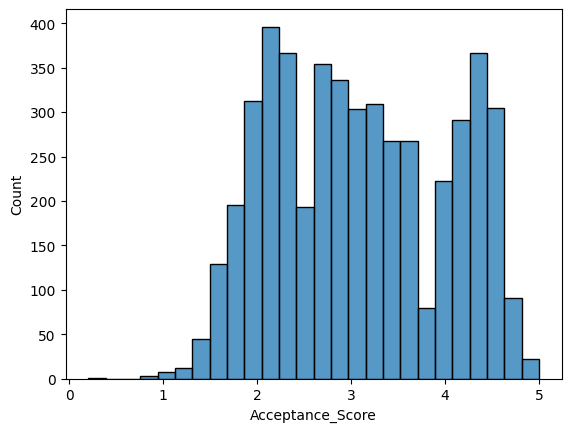

In [139]:
sns.histplot(selfvcar_inpt_df['Acceptance_Score'])

In [140]:
selfvcar_inpt_df[selfvcar_inpt_df['Acceptance_Score'] < 0.5].iloc[:,19:]

,Widespread_use_SelfDrive_Car_Score,Choice_drive_SelfDrive_Car_Score,Passenger_SelfDrive_Car_CaseB_Score,Passenger_SelfDrive_Car_CaseC_Score,Accident_SelfDrive_Car_Score,Share_road_SelfDriveCar_Score,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar,Acceptance_Score
485,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0.2


In [141]:
selfvcar_inpt_df[selfvcar_inpt_df['Acceptance_Score'] < 1].iloc[:,19:]

,Widespread_use_SelfDrive_Car_Score,Choice_drive_SelfDrive_Car_Score,Passenger_SelfDrive_Car_CaseB_Score,Passenger_SelfDrive_Car_CaseC_Score,Accident_SelfDrive_Car_Score,Share_road_SelfDriveCar_Score,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar,Acceptance_Score
485,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0.2
2820,1,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,3,0.9
9055,1,1,0,1,0,1,1,1,0.0,0.0,0.0,0.0,1,0.8
9365,1,1,0,0,0,1,3,3,0.0,0.0,0.0,0.0,1,0.9


In [142]:
# The Acceptance score values below 1 were not considered as more than 3/4th of the questions were refused to be answered
# Hence, the 4 rows were dropped from the potential 4,876 to 4,872 as it is insignificant compared to total values in dataframe

accpt_selfdrive_car = selfvcar_inpt_df[selfvcar_inpt_df['Acceptance_Score'] >= 1]
accpt_selfdrive_car

,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseB,Passenger_SelfDrive_Car_CaseC,Accident_SelfDrive_Car,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD,Share_road_SelfDriveCar,...,Accident_SelfDrive_Car_Score,Share_road_SelfDriveCar_Score,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar,Acceptance_Score
1,Not sure,Probably NOT want,Probably would happen,Probably would NOT happen,Increase the number of people killed or injure...,More acceptable,More acceptable,No difference,More acceptable,Somewhat comfortable,...,1,3,3,5,1.0,1.0,0.5,1.0,5,2.9
2,Good idea for society,Probably want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Very comfortable,...,5,4,5,5,1.0,1.0,1.0,1.0,5,4.3
5,Bad idea for society,Definitely NOT want,Definitely would happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,More acceptable,Not too comfortable,...,1,2,5,1,1.0,0.5,1.0,1.0,5,2.3
6,Bad idea for society,Probably NOT want,Probably would happen,Probably would NOT happen,Not make much difference,More acceptable,More acceptable,No difference,More acceptable,Not too comfortable,...,3,2,1,1,1.0,1.0,0.5,1.0,5,2.4
8,Bad idea for society,Probably NOT want,Probably would NOT happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,No difference,Not too comfortable,...,1,2,1,1,1.0,0.5,1.0,0.5,5,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,Bad idea for society,Probably NOT want,Definitely would happen,Probably would NOT happen,Increase the number of people killed or injure...,No difference,More acceptable,No difference,More acceptable,Somewhat comfortable,...,1,3,1,1,0.5,1.0,0.5,1.0,5,2.2
10253,Not sure,Definitely NOT want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Not too comfortable,...,5,2,3,5,1.0,1.0,1.0,1.0,5,3.2
10257,Good idea for society,Definitely want,Definitely would happen,Definitely would happen,Increase the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Extremely comfortable,...,1,5,5,5,1.0,1.0,1.0,1.0,5,4.2
10258,Good idea for society,Definitely want,Probably would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,No difference,No difference,Very comfortable,...,5,4,5,1,1.0,1.0,0.5,0.5,5,4.5


<Axes: xlabel='Acceptance_Score', ylabel='Count'>

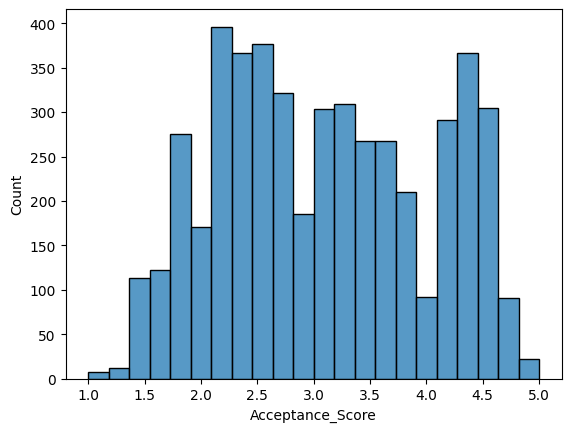

In [143]:
sns.histplot(accpt_selfdrive_car['Acceptance_Score'])

In [144]:
# Mean value of Acceptance_Score: 3.09, Median value of Acceptance_Score: 3.00
accpt_selfdrive_car['Acceptance_Score'].describe()

count    4872.000000
mean        3.094458
std         0.925761
min         1.000000
25%         2.300000
50%         3.000000
75%         3.900000
max         5.000000
Name: Acceptance_Score, dtype: float64

In [145]:
thirty_percentile = accpt_selfdrive_car['Acceptance_Score'].quantile([0.3])
seventy_percentile = accpt_selfdrive_car['Acceptance_Score'].quantile([0.7])

# Split the acceptance rate in 3 buckets of (0%-30%): Less Acceptable, (30%-70%): In-Between Acceptable, (70%+): More Acceptable
print(f'30%: {thirty_percentile}')  
print(f'70%: {seventy_percentile}') 

30%: 0.3    2.4
Name: Acceptance_Score, dtype: float64
70%: 0.7    3.7
Name: Acceptance_Score, dtype: float64


In [146]:
# Higher Threshold: 3.7
# Lower Threshold: 2.4

total_count = accpt_selfdrive_car.count()['Acceptance_Score']
more_accpt_score = accpt_selfdrive_car[accpt_selfdrive_car['Acceptance_Score'] >= 3.7].count()['Acceptance_Score']
less_accpt_score = accpt_selfdrive_car[accpt_selfdrive_car['Acceptance_Score'] <= 2.4].count()['Acceptance_Score']
inbetween_score = total_count - (more_accpt_score + less_accpt_score)

print(f'More Acceptable Count: {more_accpt_score}')
print(f'In-Between Acceptable Count: {inbetween_score}')
print(f'Less Acceptable Count: {less_accpt_score}')


More Acceptable Count: 1516
In-Between Acceptable Count: 2075
Less Acceptable Count: 1281


In [147]:
accpt_selfdrive_car.columns

Index(['Widespread_use_SelfDrive_Car', 'Choice_drive_SelfDrive_Car',
       'Passenger_SelfDrive_Car_CaseB', 'Passenger_SelfDrive_Car_CaseC',
       'Accident_SelfDrive_Car', 'Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD', 'Share_road_SelfDriveCar',
       'Purpose_SelfDriveCar_CaseA', 'Purpose_SelfDriveCar_CaseC',
       'Demographic_Region', 'Age', 'Gender', 'Education_Degree', 'Ethnicity',
       'Income_Level', 'Ideology', 'Widespread_use_SelfDrive_Car_Score',
       'Choice_drive_SelfDrive_Car_Score',
       'Passenger_SelfDrive_Car_CaseB_Score',
       'Passenger_SelfDrive_Car_CaseC_Score', 'Accident_SelfDrive_Car_Score',
       'Share_road_SelfDriveCar_Score', 'Purpose_SelfDriveCar_CaseA_Score',
       'Purpose_SelfDriveCar_CaseC_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseA_Score',
       'Accpt_circumstances_SelfDrive_Car_Ca

In [148]:
accpt_selfdrive_car['Age'].unique()

array(['65+', '30-49', '50-64', '18-29', 0], dtype=object)

In [149]:
accpt_selfdrive_car['Income_Level'].unique()

array(['40000 - 50000', '100000', 0, '80000 - 90000', '30000',
       '30000 - 40000', '90000 - 100000', '60000 - 70000',
       '70000 - 80000', '50000 - 60000'], dtype=object)

In [150]:
age_mapping = {
    '0': 1,
    '18-29': 2,
    '30-49': 3,
    '50-64': 4,
    '65+': 5
}

income_mapping = {
    '0': 1,
    '30000': 2,
    '30000 - 40000': 3,
    '40000 - 50000': 4,
    '50000 - 60000': 5,
    '60000 - 70000': 6,
    '70000 - 80000': 7,
    '80000 - 90000': 8,
    '90000 - 100000' : 9,
    '100000' : 10
}

accpt_selfdrive_car['Age_continuous'] = accpt_selfdrive_car['Age'].map(age_mapping)
accpt_selfdrive_car['Income_continuous'] = accpt_selfdrive_car['Income_Level'].map(income_mapping)


/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_51449/759921298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accpt_selfdrive_car['Age_continuous'] = accpt_selfdrive_car['Age'].map(age_mapping)
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_51449/759921298.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accpt_selfdrive_car['Income_continuous'] = accpt_selfdrive_car['Income_Level'].map(income_mapping)


In [151]:
accpt_selfdrive_car

,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseB,Passenger_SelfDrive_Car_CaseC,Accident_SelfDrive_Car,Accpt_circumstances_SelfDrive_Car_CaseA,Accpt_circumstances_SelfDrive_Car_CaseB,Accpt_circumstances_SelfDrive_Car_CaseC,Accpt_circumstances_SelfDrive_Car_CaseD,Share_road_SelfDriveCar,...,Purpose_SelfDriveCar_CaseA_Score,Purpose_SelfDriveCar_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseA_Score,Accpt_circumstances_SelfDrive_Car_CaseB_Score,Accpt_circumstances_SelfDrive_Car_CaseC_Score,Accpt_circumstances_SelfDrive_Car_CaseD_Score,Accpt_circumstance_SelfCar,Acceptance_Score,Age_continuous,Income_continuous
1,Not sure,Probably NOT want,Probably would happen,Probably would NOT happen,Increase the number of people killed or injure...,More acceptable,More acceptable,No difference,More acceptable,Somewhat comfortable,...,3,5,1.0,1.0,0.5,1.0,5,2.9,5.0,4.0
2,Good idea for society,Probably want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Very comfortable,...,5,5,1.0,1.0,1.0,1.0,5,4.3,3.0,10.0
5,Bad idea for society,Definitely NOT want,Definitely would happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,More acceptable,Not too comfortable,...,5,1,1.0,0.5,1.0,1.0,5,2.3,5.0,10.0
6,Bad idea for society,Probably NOT want,Probably would happen,Probably would NOT happen,Not make much difference,More acceptable,More acceptable,No difference,More acceptable,Not too comfortable,...,1,1,1.0,1.0,0.5,1.0,5,2.4,5.0,4.0
8,Bad idea for society,Probably NOT want,Probably would NOT happen,Definitely would NOT happen,Increase the number of people killed or injure...,More acceptable,No difference,More acceptable,No difference,Not too comfortable,...,1,1,1.0,0.5,1.0,0.5,5,2.3,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,Bad idea for society,Probably NOT want,Definitely would happen,Probably would NOT happen,Increase the number of people killed or injure...,No difference,More acceptable,No difference,More acceptable,Somewhat comfortable,...,1,1,0.5,1.0,0.5,1.0,5,2.2,3.0,2.0
10253,Not sure,Definitely NOT want,Definitely would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Not too comfortable,...,3,5,1.0,1.0,1.0,1.0,5,3.2,5.0,5.0
10257,Good idea for society,Definitely want,Definitely would happen,Definitely would happen,Increase the number of people killed or injure...,More acceptable,More acceptable,More acceptable,More acceptable,Extremely comfortable,...,5,5,1.0,1.0,1.0,1.0,5,4.2,2.0,2.0
10258,Good idea for society,Definitely want,Probably would happen,Probably would happen,Decrease the number of people killed or injure...,More acceptable,More acceptable,No difference,No difference,Very comfortable,...,5,1,1.0,1.0,0.5,0.5,5,4.5,5.0,4.0


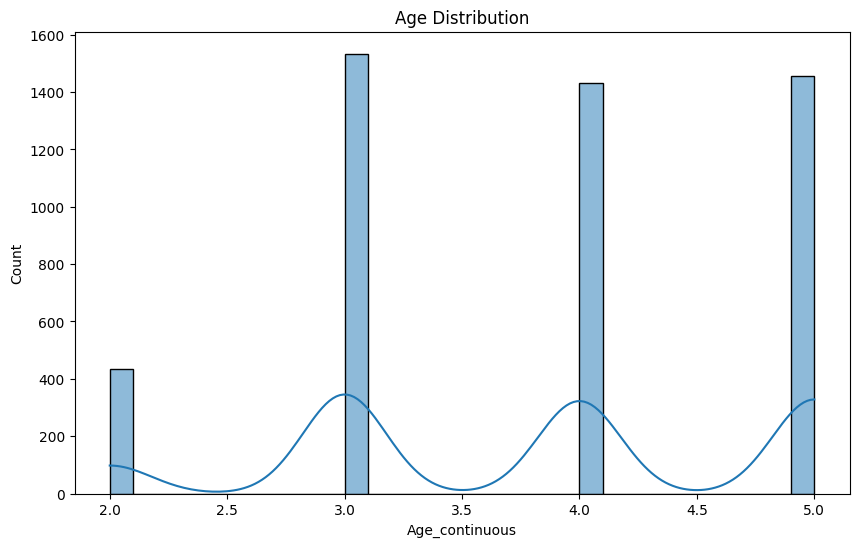

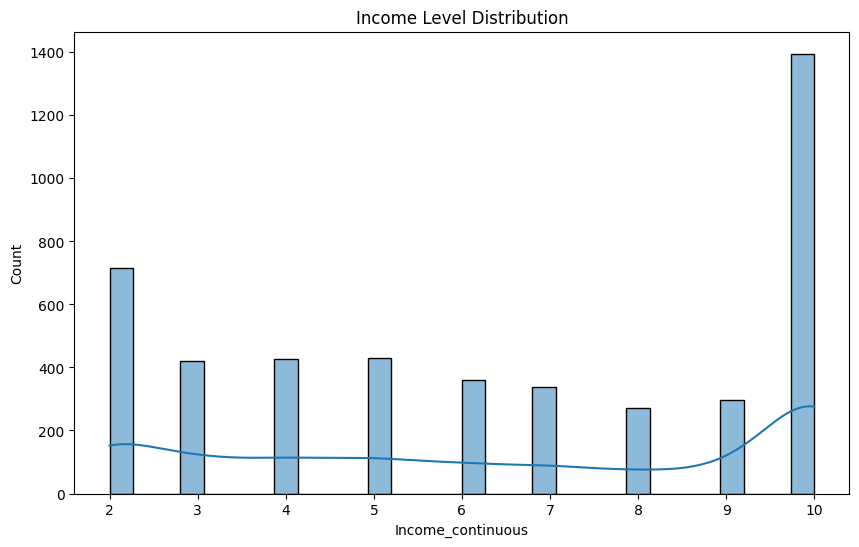

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(accpt_selfdrive_car['Age_continuous'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(accpt_selfdrive_car['Income_continuous'], bins=30, kde=True)
plt.title('Income Level Distribution')
plt.show()

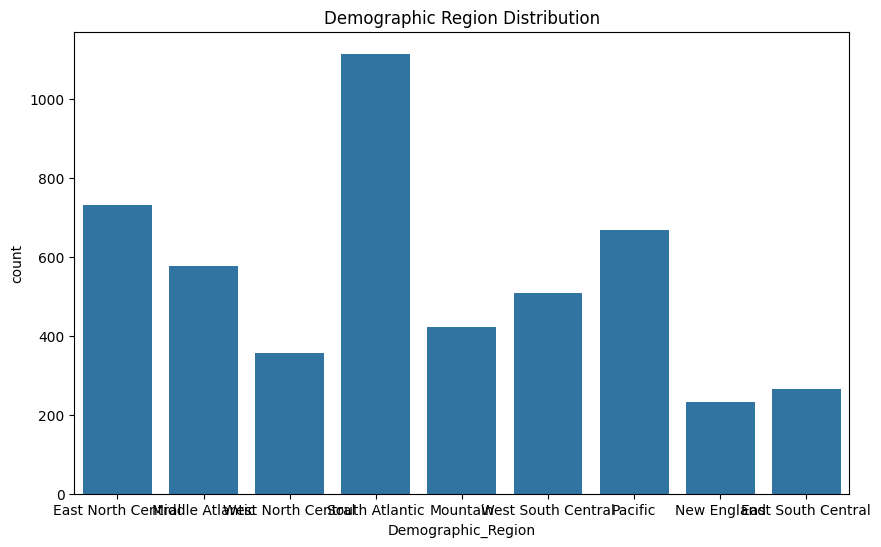

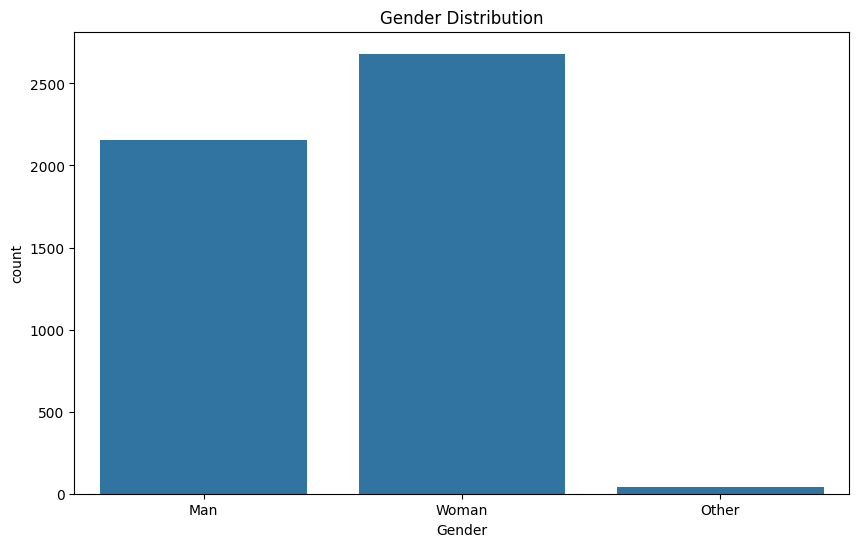

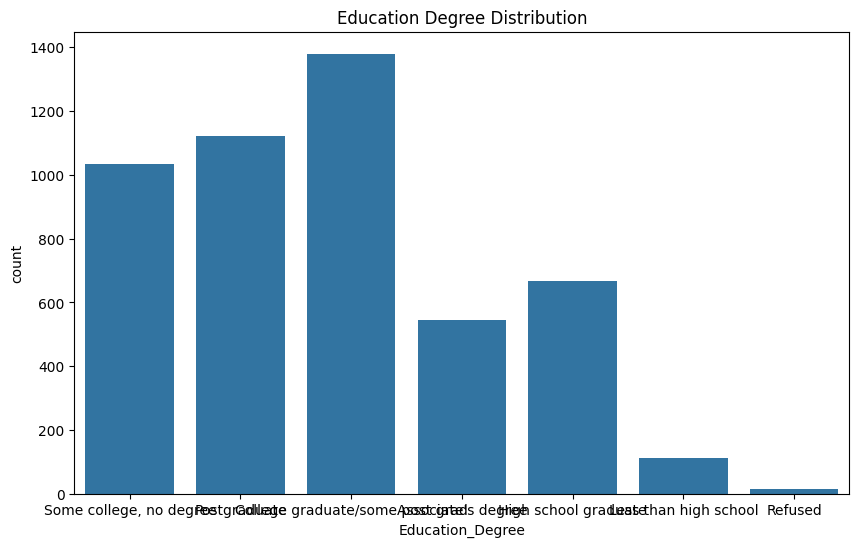

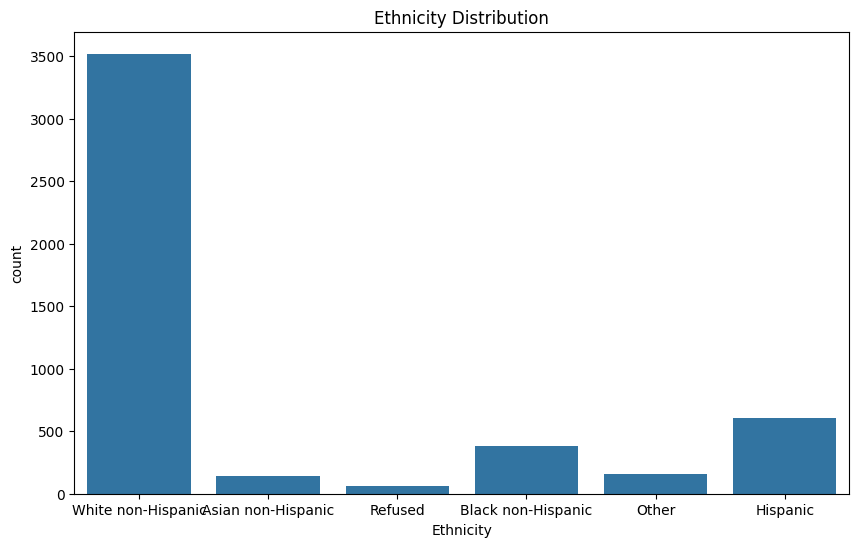

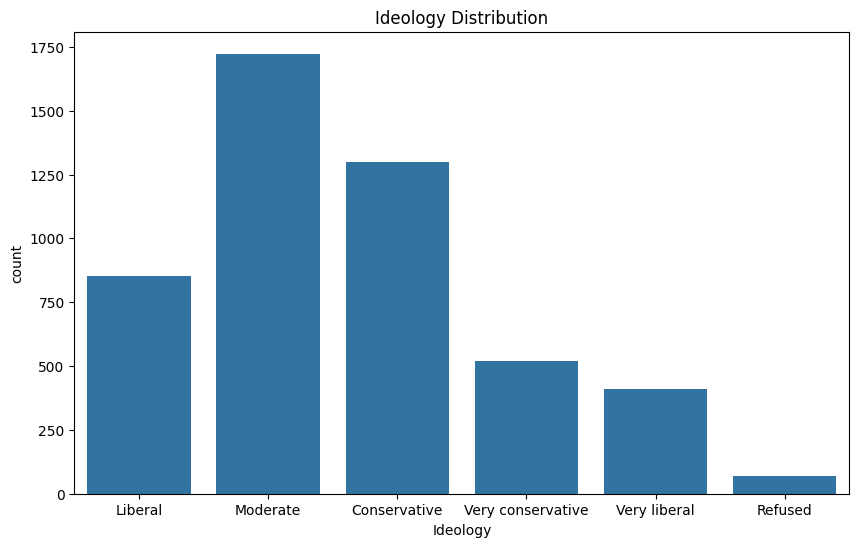

In [153]:
# Demographic_Region 
plt.figure(figsize=(10, 6))
sns.countplot(x='Demographic_Region', data=accpt_selfdrive_car)
plt.title('Demographic Region Distribution')
plt.show()

# Gender 
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=accpt_selfdrive_car)
plt.title('Gender Distribution')
plt.show()

# Education_Degree 
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Degree', data=accpt_selfdrive_car)
plt.title('Education Degree Distribution')
plt.show()

# Ethnicity 
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', data=accpt_selfdrive_car)
plt.title('Ethnicity Distribution')
plt.show()

# Ideology 
plt.figure(figsize=(10, 6))
sns.countplot(x='Ideology', data=accpt_selfdrive_car)
plt.title('Ideology Distribution')
plt.show()


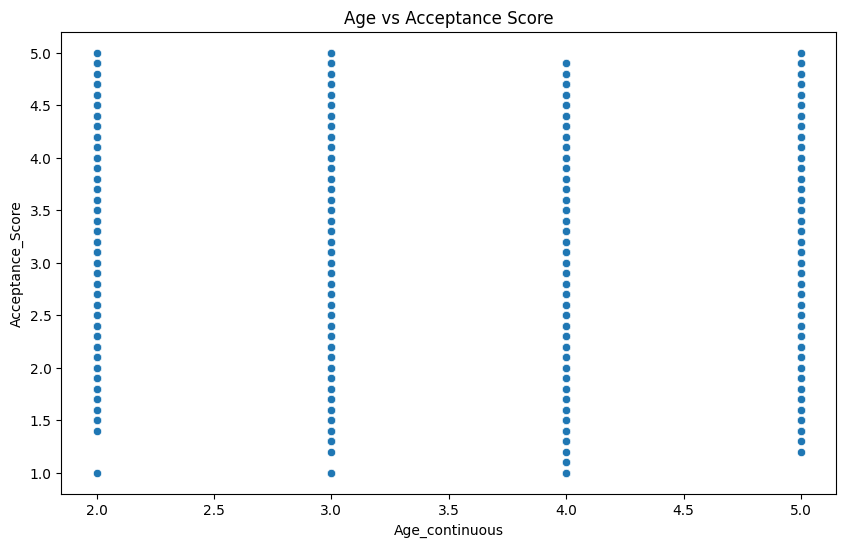

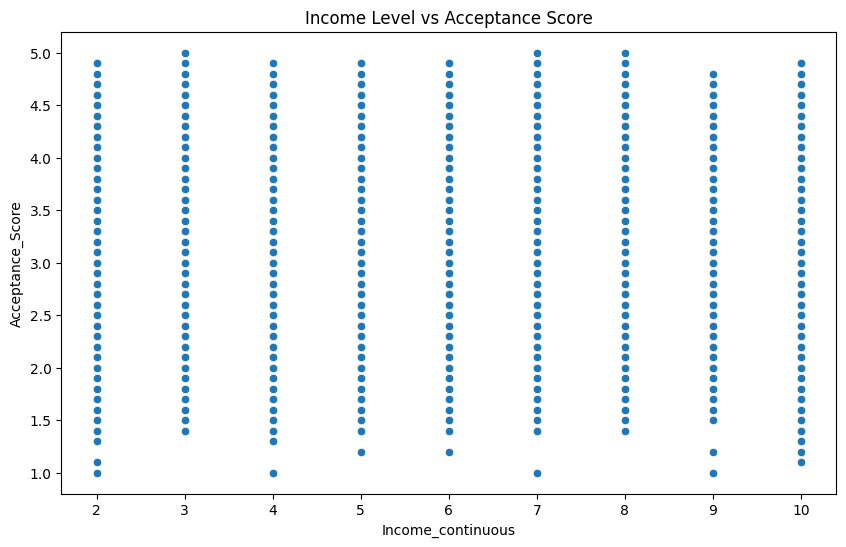

In [154]:
# Relationship between Age and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_continuous', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Age vs Acceptance Score')
plt.show()

# Relationship between Income and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income_continuous', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Income Level vs Acceptance Score')
plt.show()


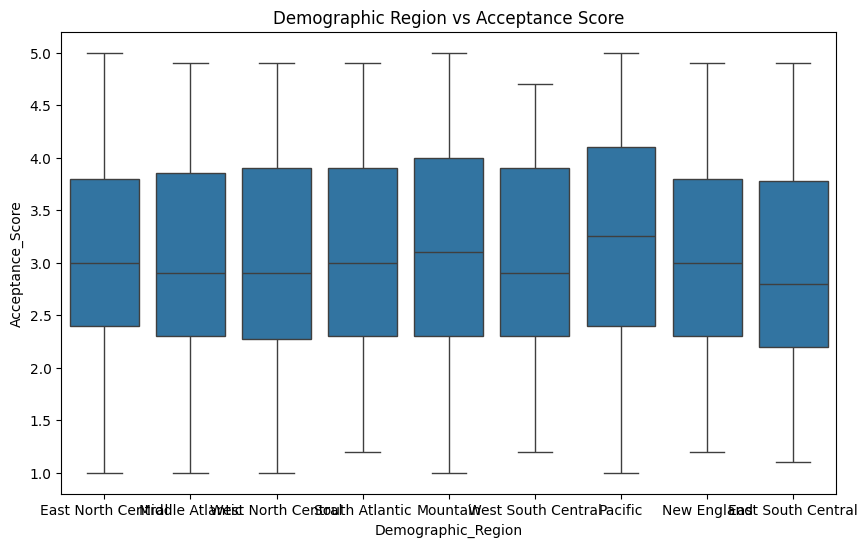

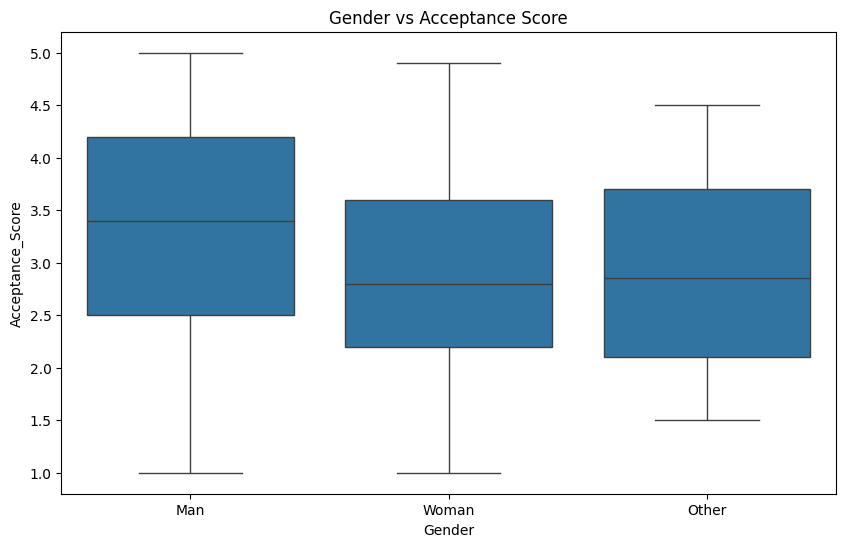

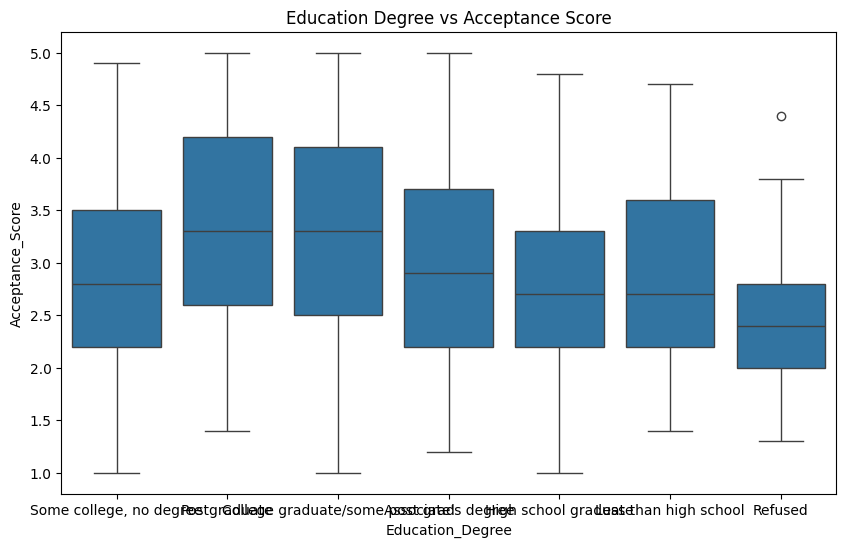

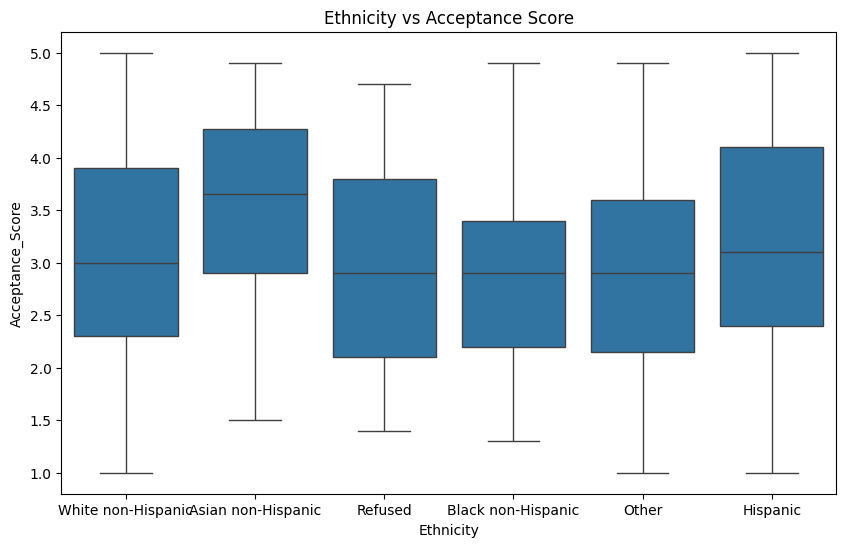

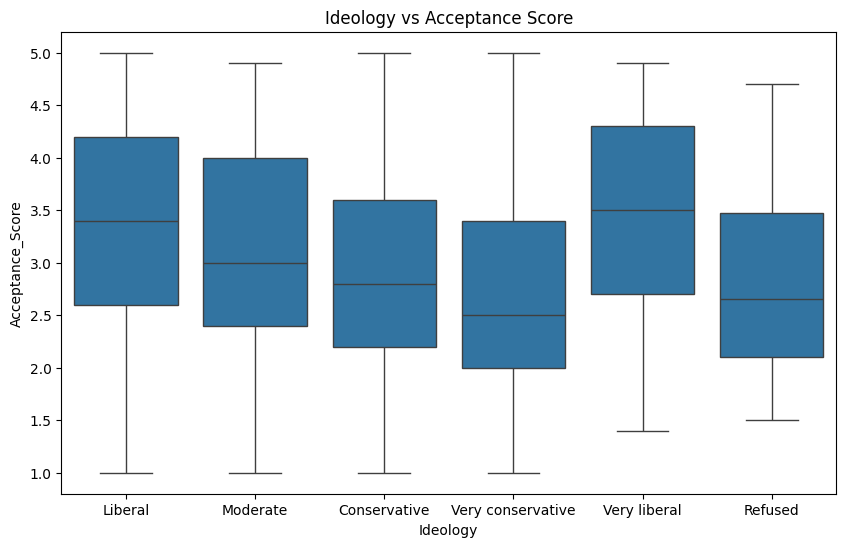

In [155]:
# Demographic_Region and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Demographic_Region', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Demographic Region vs Acceptance Score')
plt.show()

# Gender and Acceptance_Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Gender vs Acceptance Score')
plt.show()

# Education_Degree and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Degree', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Education Degree vs Acceptance Score')
plt.show()

# Ethnicity and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ethnicity', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Ethnicity vs Acceptance Score')
plt.show()

# Ideology and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ideology', y='Acceptance_Score', data=accpt_selfdrive_car)
plt.title('Ideology vs Acceptance Score')
plt.show()


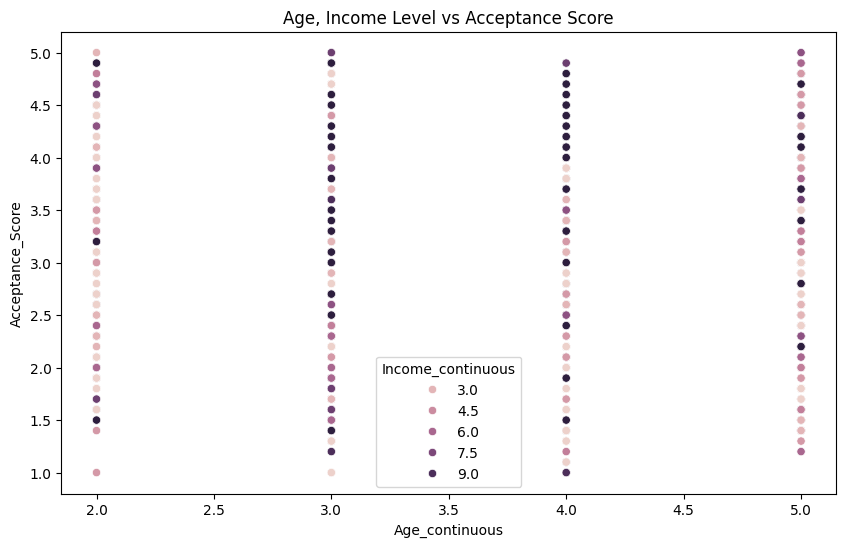

In [156]:
# Age、Income_Level and Acceptance_Score 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_continuous', y='Acceptance_Score', hue='Income_continuous', data=accpt_selfdrive_car)
plt.title('Age, Income Level vs Acceptance Score')
plt.show()


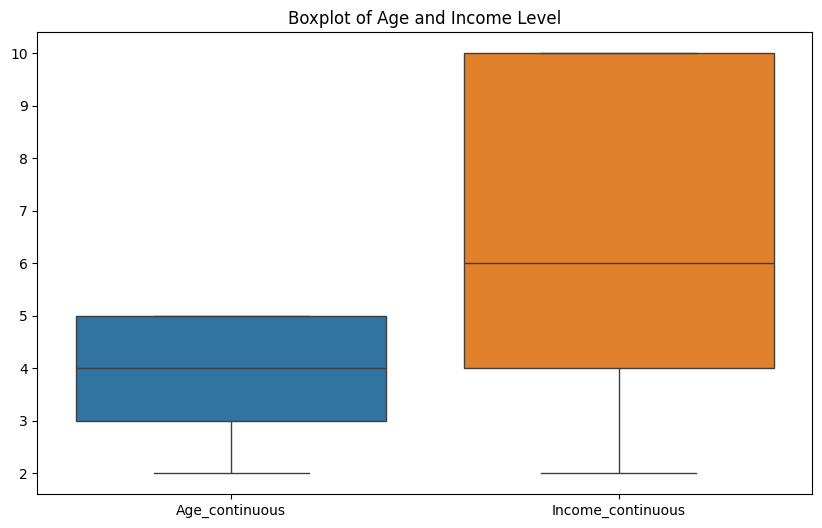

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=accpt_selfdrive_car[['Age_continuous', 'Income_continuous']])
plt.title('Boxplot of Age and Income Level')
plt.show()

In [161]:
accpt_selfdrive_car.columns

Index(['Widespread_use_SelfDrive_Car', 'Choice_drive_SelfDrive_Car',
       'Passenger_SelfDrive_Car_CaseB', 'Passenger_SelfDrive_Car_CaseC',
       'Accident_SelfDrive_Car', 'Accpt_circumstances_SelfDrive_Car_CaseA',
       'Accpt_circumstances_SelfDrive_Car_CaseB',
       'Accpt_circumstances_SelfDrive_Car_CaseC',
       'Accpt_circumstances_SelfDrive_Car_CaseD', 'Share_road_SelfDriveCar',
       'Purpose_SelfDriveCar_CaseA', 'Purpose_SelfDriveCar_CaseC',
       'Demographic_Region', 'Age', 'Gender', 'Education_Degree', 'Ethnicity',
       'Income_Level', 'Ideology', 'Widespread_use_SelfDrive_Car_Score',
       'Choice_drive_SelfDrive_Car_Score',
       'Passenger_SelfDrive_Car_CaseB_Score',
       'Passenger_SelfDrive_Car_CaseC_Score', 'Accident_SelfDrive_Car_Score',
       'Share_road_SelfDriveCar_Score', 'Purpose_SelfDriveCar_CaseA_Score',
       'Purpose_SelfDriveCar_CaseC_Score',
       'Accpt_circumstances_SelfDrive_Car_CaseA_Score',
       'Accpt_circumstances_SelfDrive_Car_Ca

In [179]:
# 　create a new df
model_df = accpt_selfdrive_car[['Acceptance_Score','Age_continuous','Income_continuous','Demographic_Region', 'Gender', 'Education_Degree', 'Ethnicity', 'Ideology','Age','Income_Level']]

In [172]:
model_df

,Acceptance_Score,Age_continuous,Income_continuous,Demographic_Region,Gender,Education_Degree,Ethnicity,Ideology
1,2.9,5.0,4.0,East North Central,Man,"Some college, no degree",White non-Hispanic,Liberal
2,4.3,3.0,10.0,Middle Atlantic,Woman,Postgraduate,White non-Hispanic,Moderate
5,2.3,5.0,10.0,West North Central,Woman,College graduate/some post grad,White non-Hispanic,Conservative
6,2.4,5.0,4.0,South Atlantic,Man,"Some college, no degree",White non-Hispanic,Conservative
8,2.3,4.0,10.0,Mountain,Woman,"Some college, no degree",Asian non-Hispanic,Conservative
...,...,...,...,...,...,...,...,...
10252,2.2,3.0,2.0,Pacific,Man,College graduate/some post grad,Asian non-Hispanic,Moderate
10253,3.2,5.0,5.0,East North Central,Man,High school graduate,White non-Hispanic,Refused
10257,4.2,2.0,2.0,South Atlantic,Woman,Associate's degree,White non-Hispanic,Liberal
10258,4.5,5.0,4.0,East North Central,Man,"Some college, no degree",White non-Hispanic,Moderate


In [181]:
df_encoded = pd.get_dummies(model_df, columns=['Demographic_Region', 'Gender', 'Education_Degree', 'Ethnicity', 'Ideology','Age','Income_Level'], drop_first=True)

# 计算相关性矩阵
corr_matrix = df_encoded.corr()

# 打印相关性矩阵
print(corr_matrix)

                                                  Acceptance_Score  \
Acceptance_Score                                          1.000000   
Age_continuous                                           -0.152799   
Income_continuous                                         0.155172   
Demographic_Region_East South Central                    -0.025303   
Demographic_Region_Middle Atlantic                       -0.020009   
Demographic_Region_Mountain                               0.020527   
Demographic_Region_New England                           -0.004716   
Demographic_Region_Pacific                                0.058665   
Demographic_Region_South Atlantic                        -0.002918   
Demographic_Region_West North Central                    -0.010247   
Demographic_Region_West South Central                    -0.021950   
Gender_Other                                             -0.013584   
Gender_Woman                                             -0.207686   
Education_Degree_Col

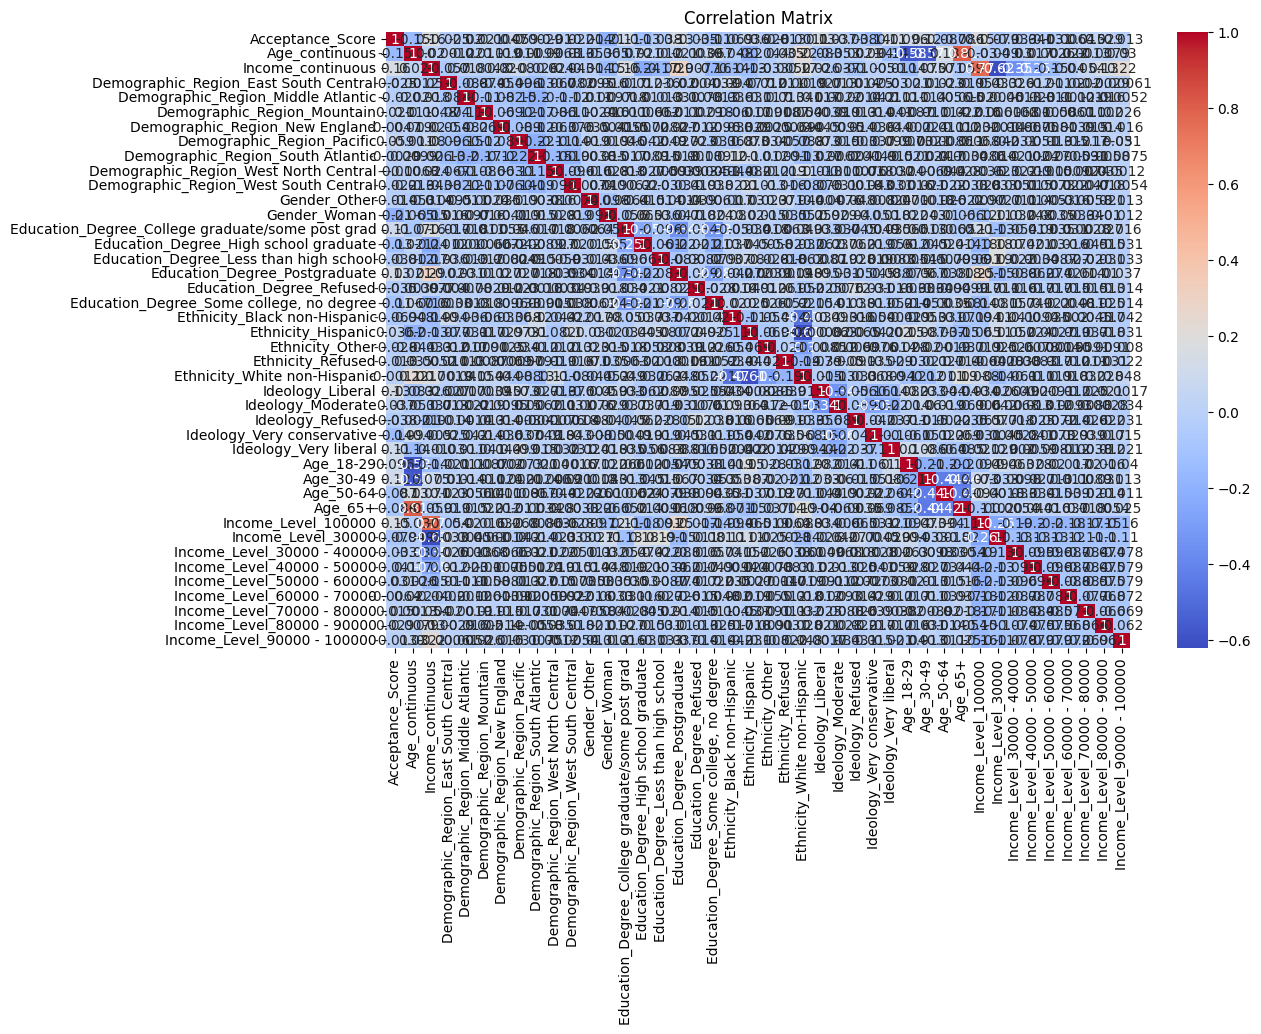

In [182]:
# 可视化相关性矩阵
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

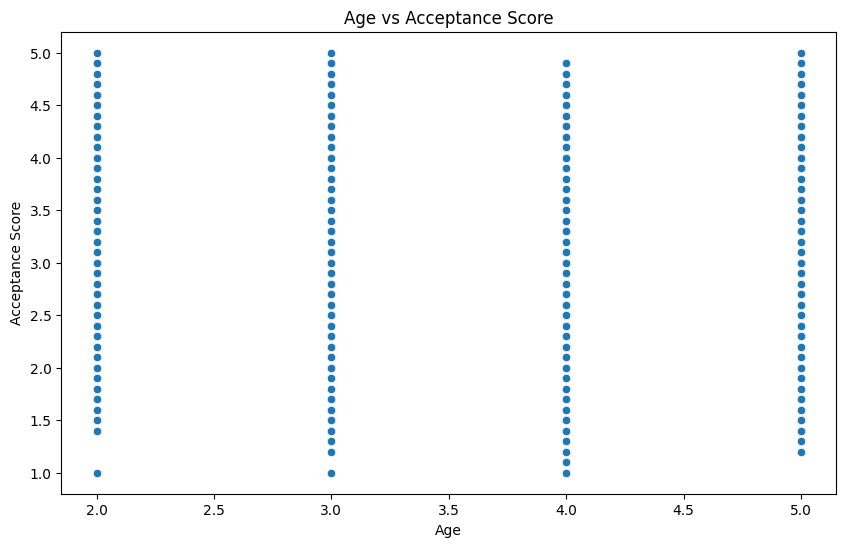

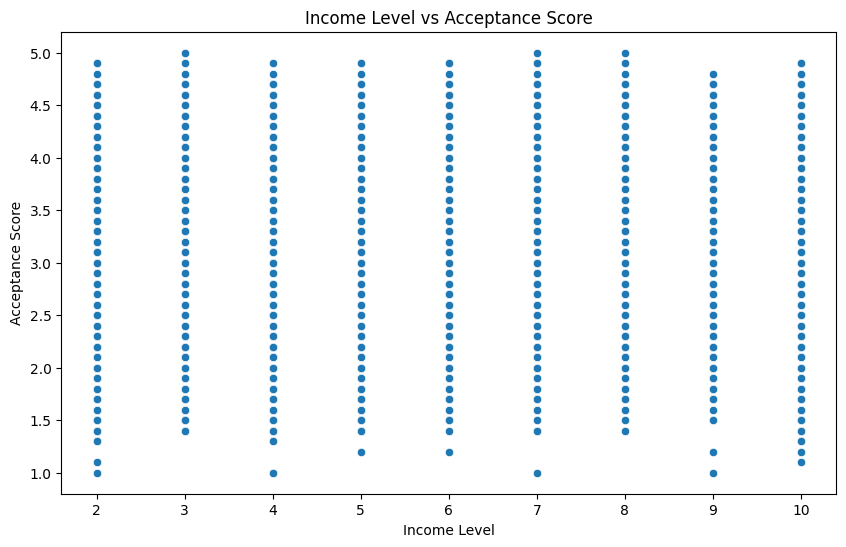

In [183]:
# Acceptance_Score 与 Age_continuous 的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_continuous', y='Acceptance_Score', data=df_encoded)
plt.title('Age vs Acceptance Score')
plt.xlabel('Age')
plt.ylabel('Acceptance Score')
plt.show()

# Acceptance_Score 与 Income_continuous 的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income_continuous', y='Acceptance_Score', data=df_encoded)
plt.title('Income Level vs Acceptance Score')
plt.xlabel('Income Level')
plt.ylabel('Acceptance Score')
plt.show()


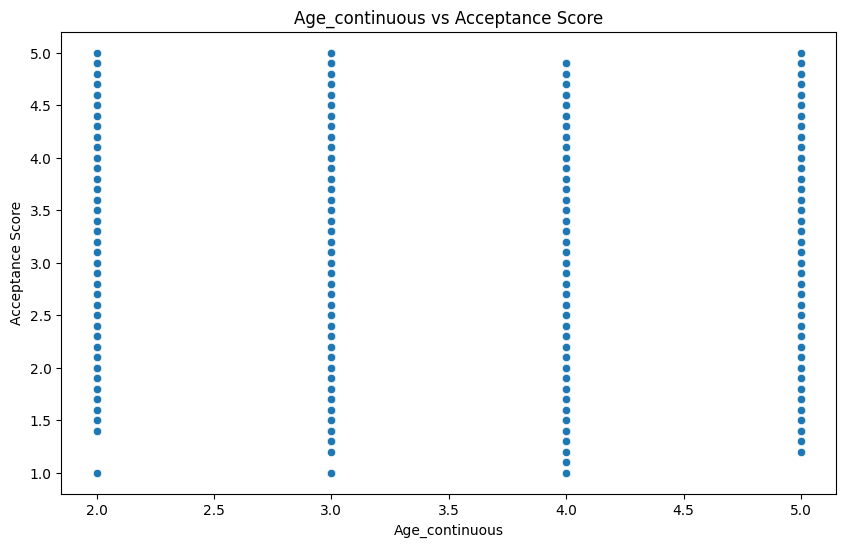

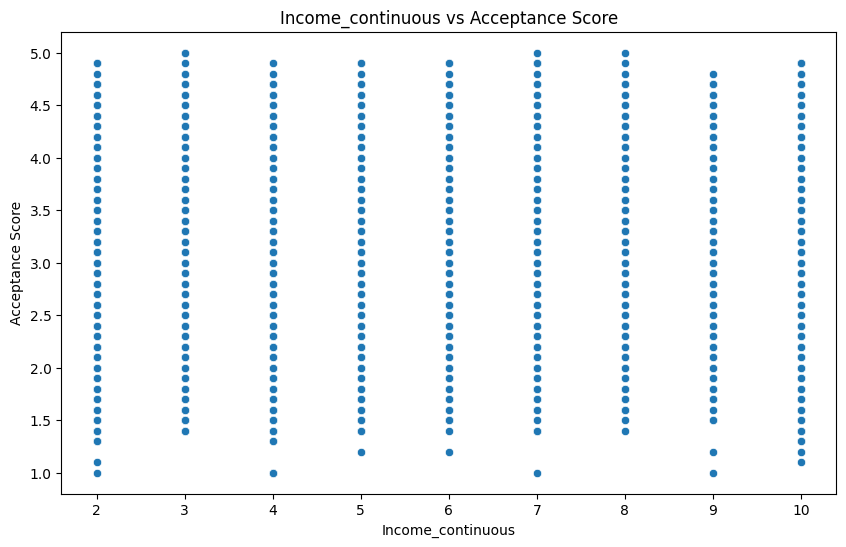

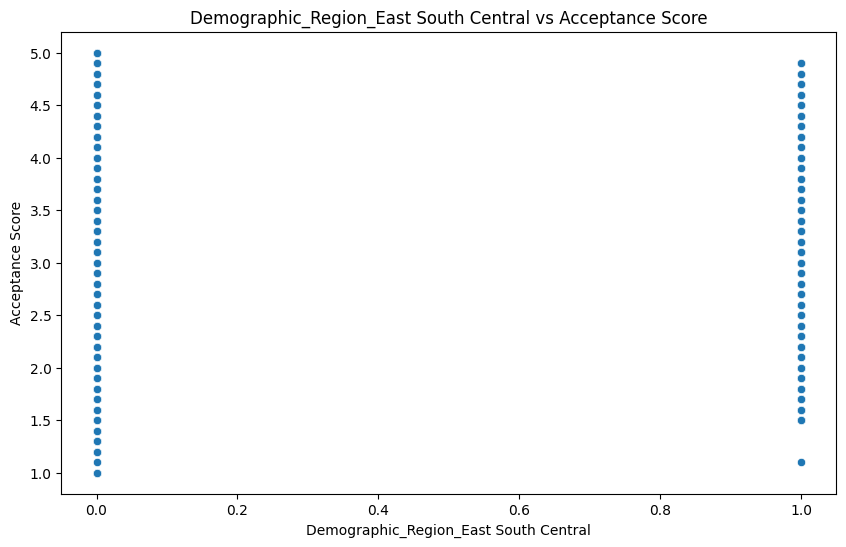

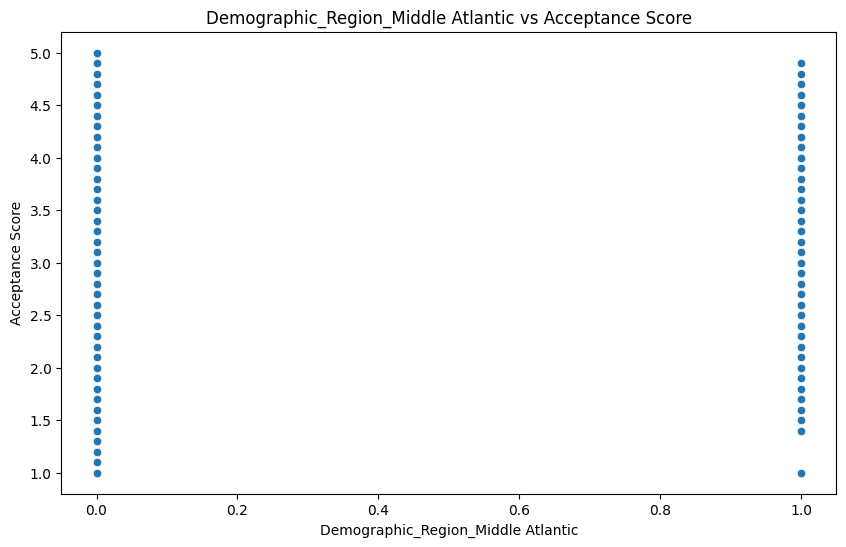

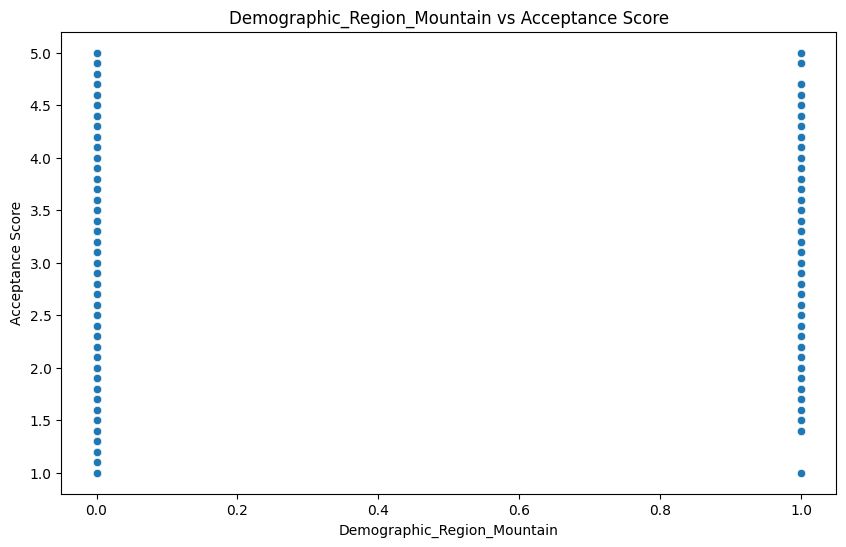

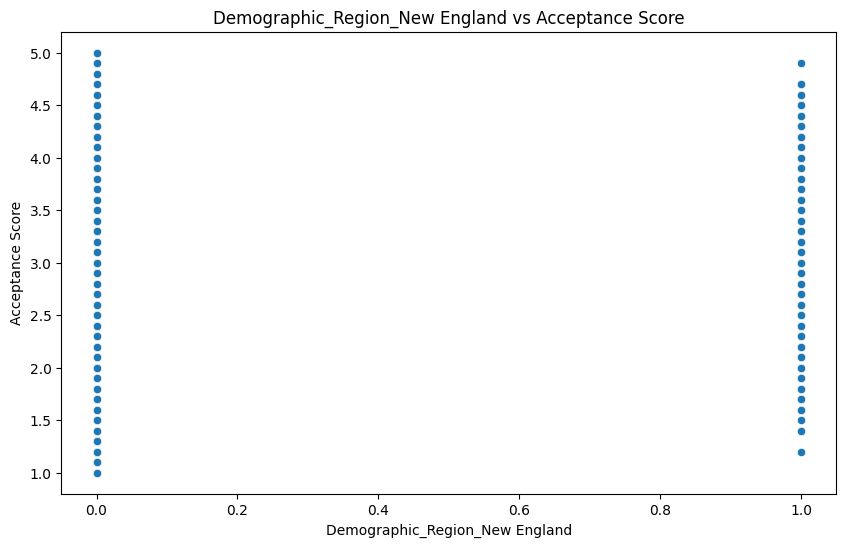

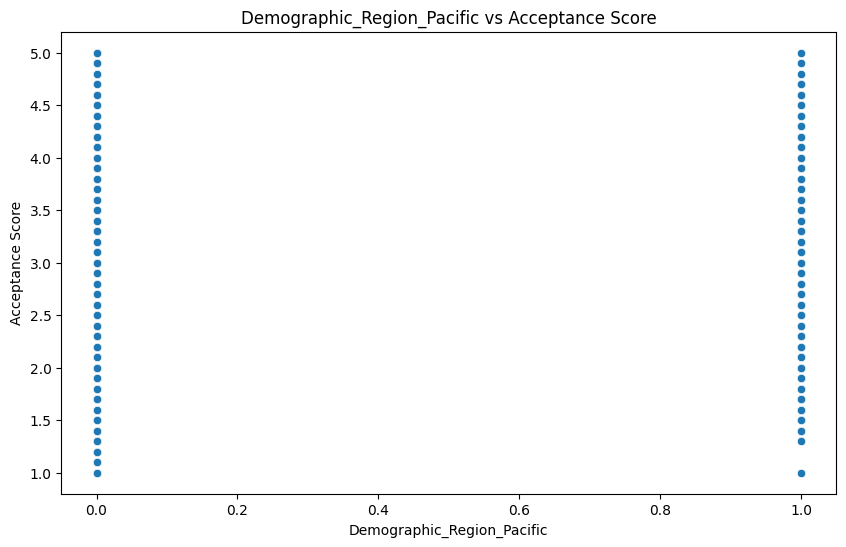

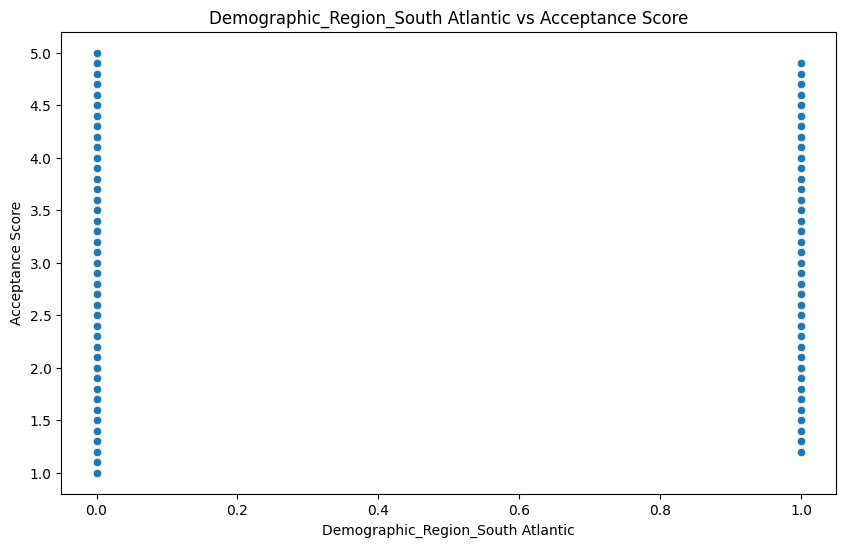

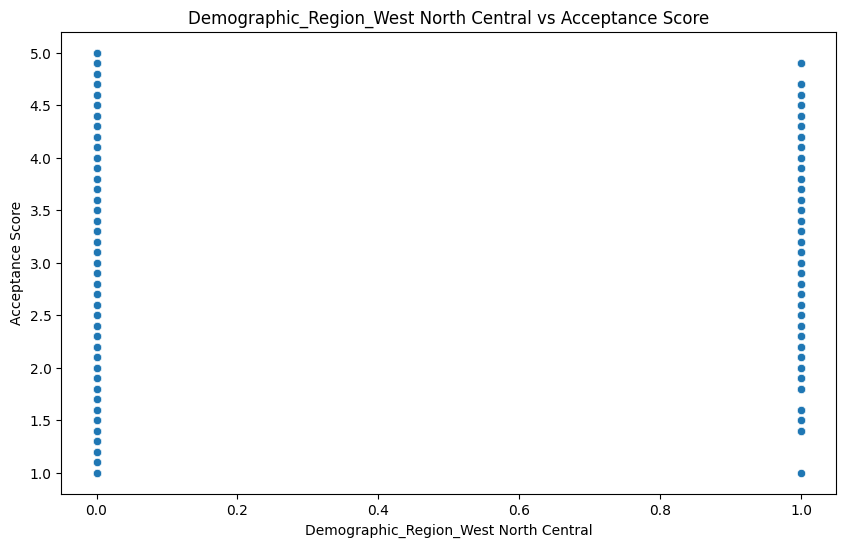

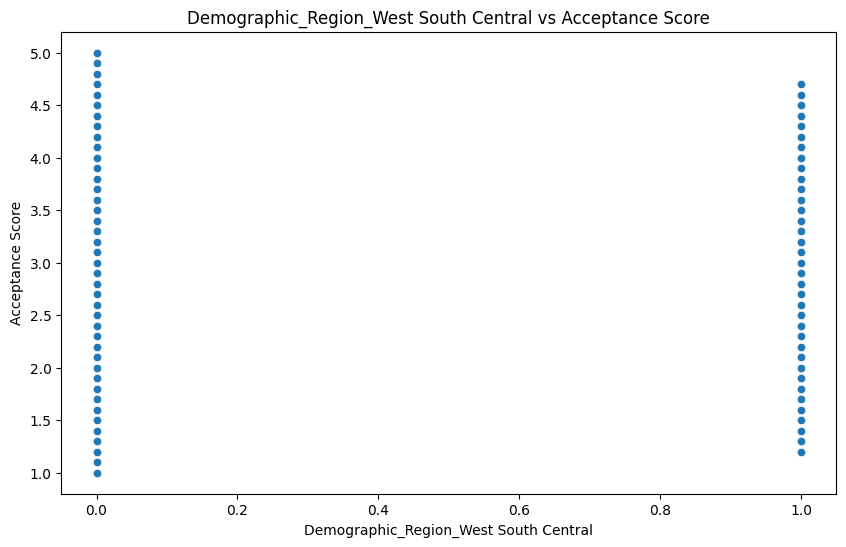

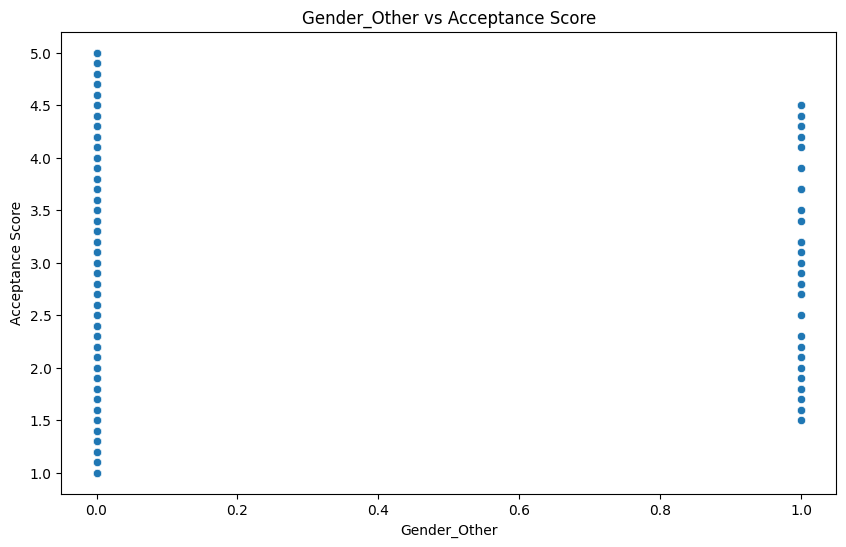

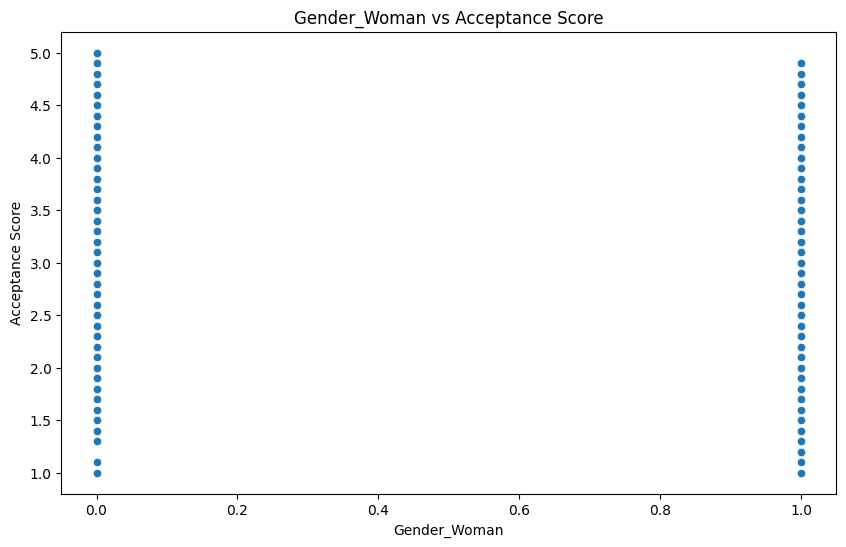

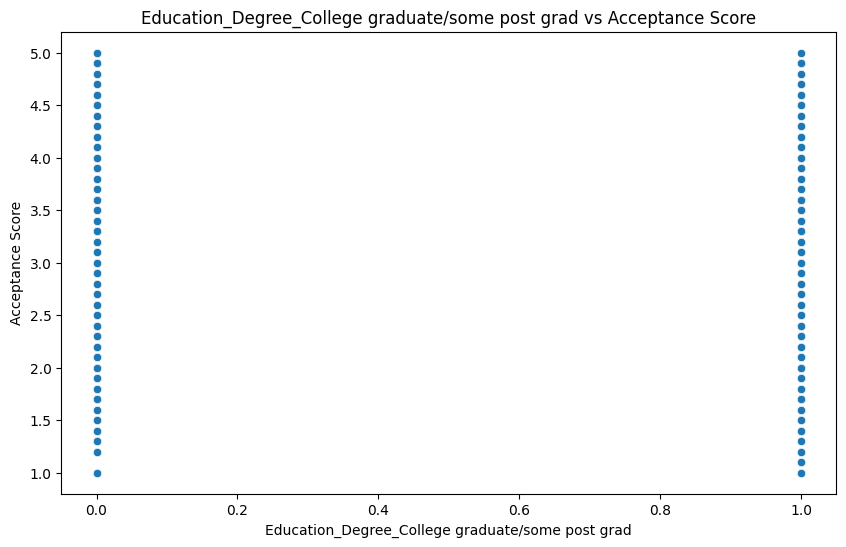

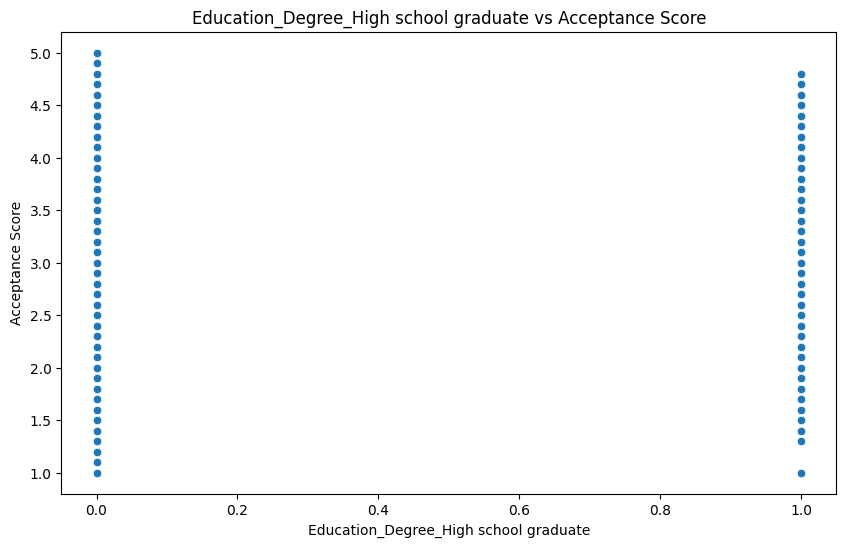

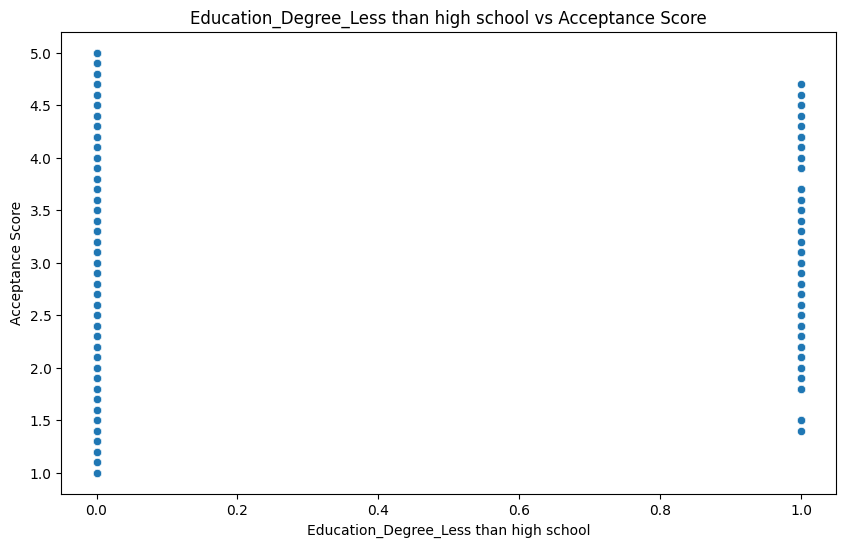

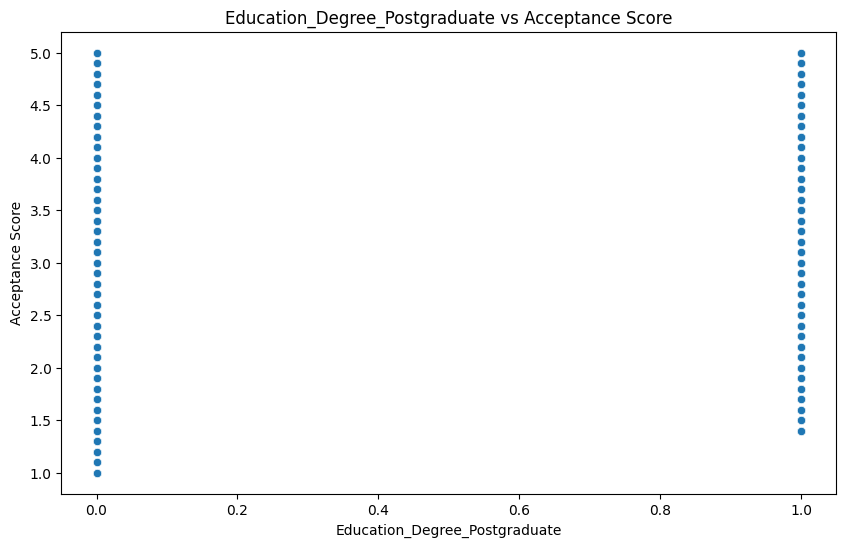

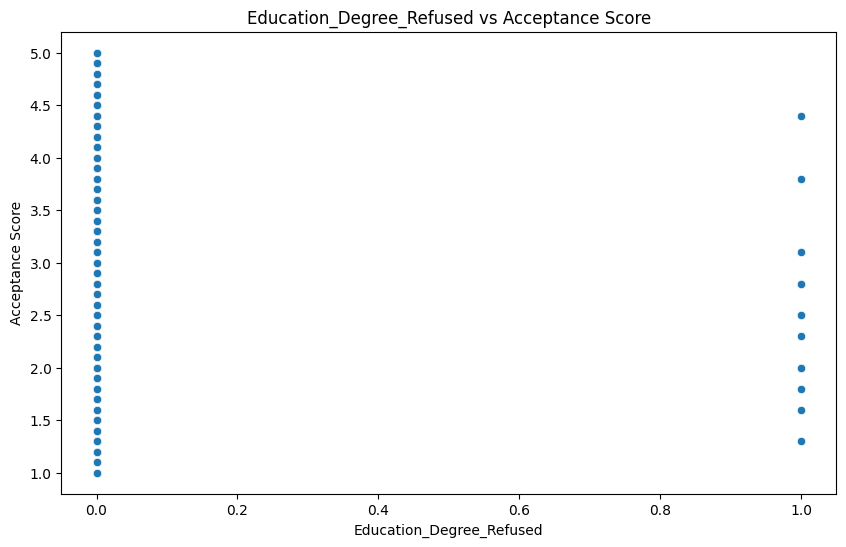

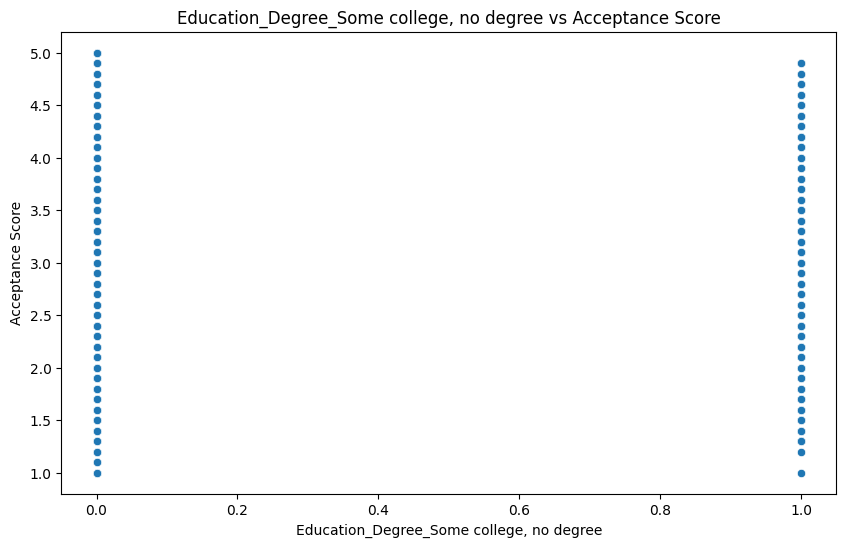

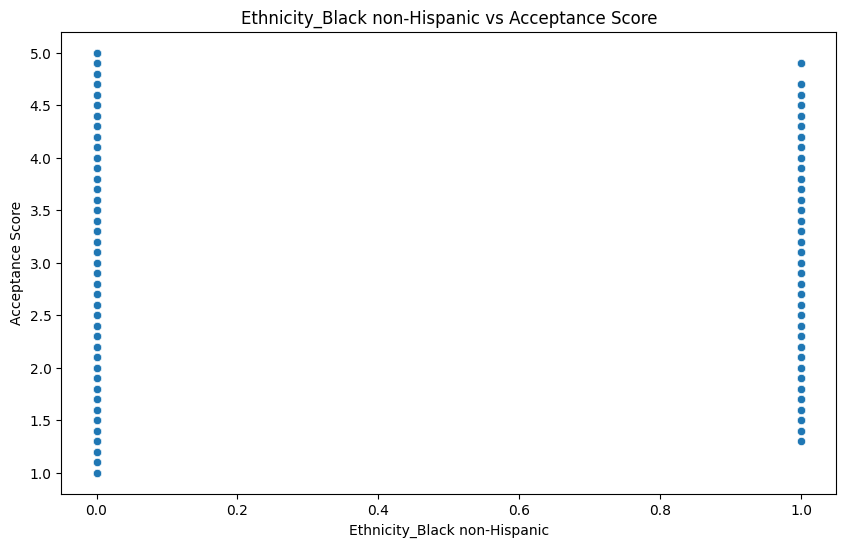

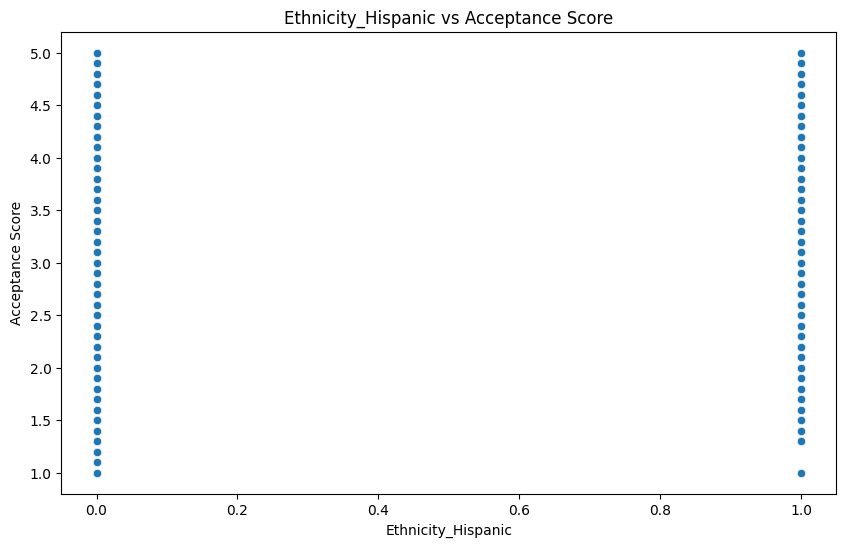

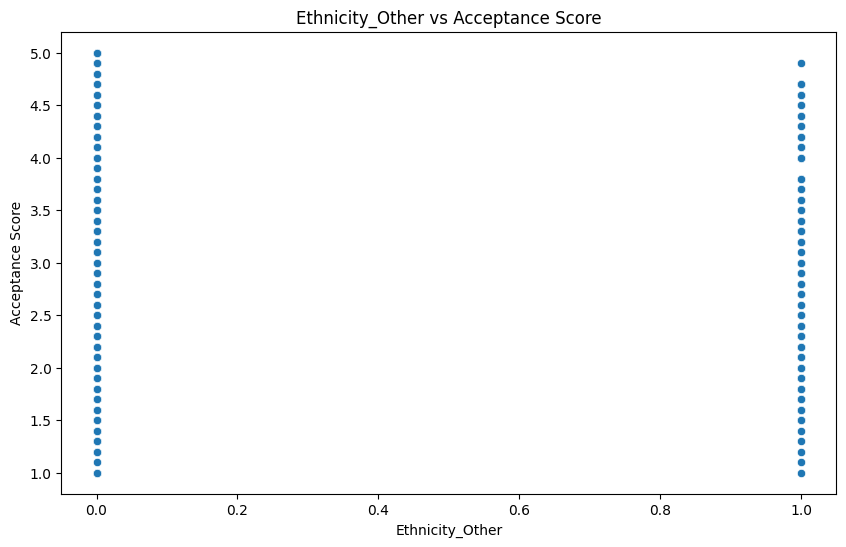

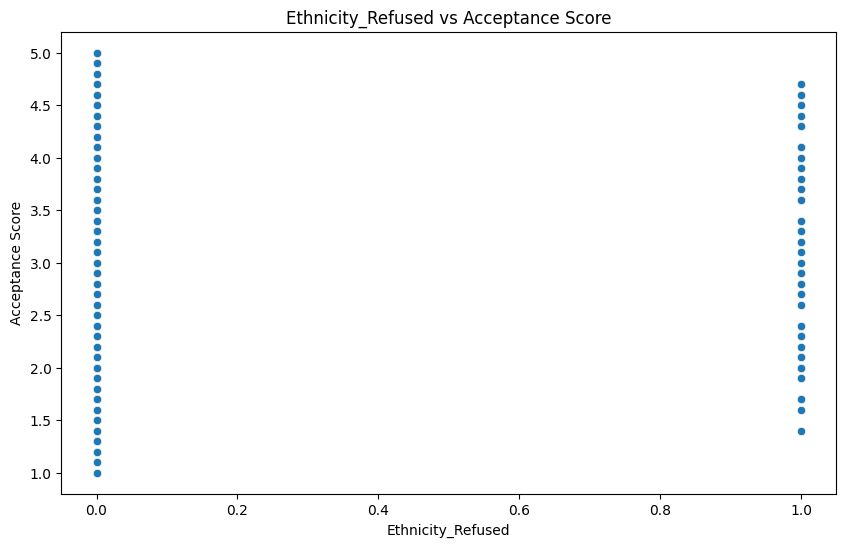

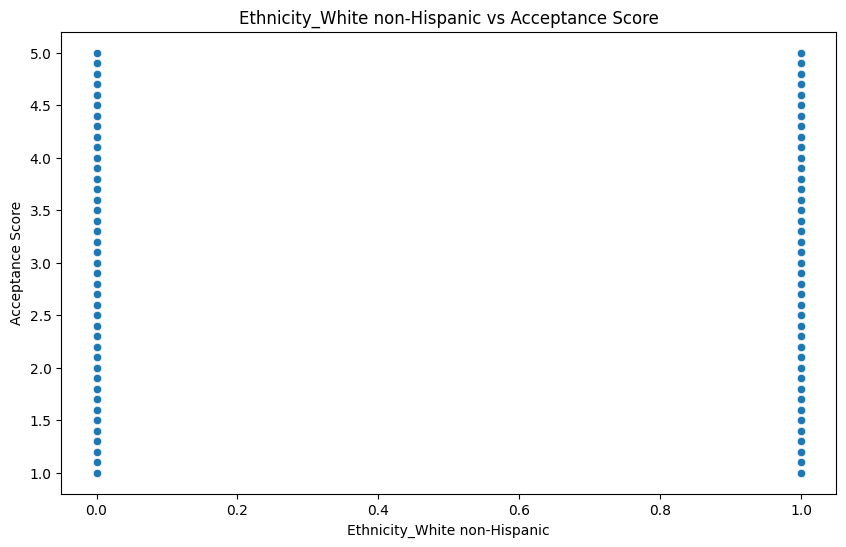

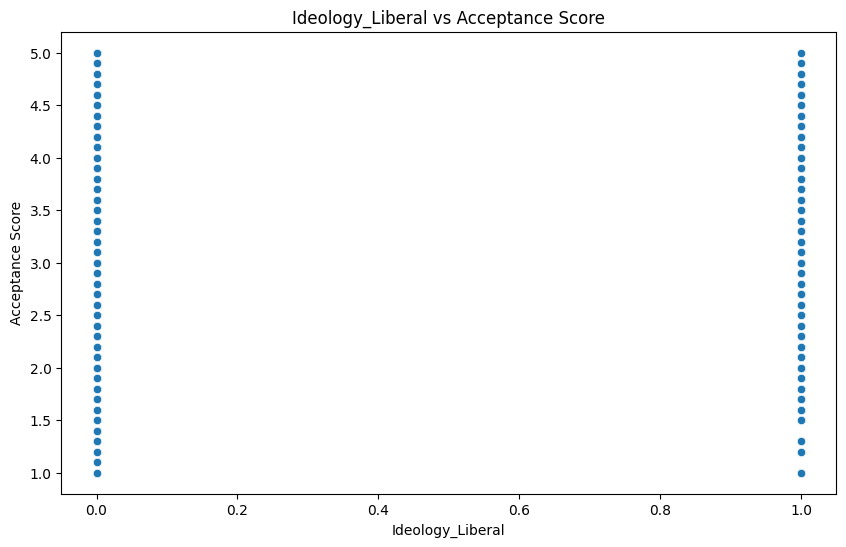

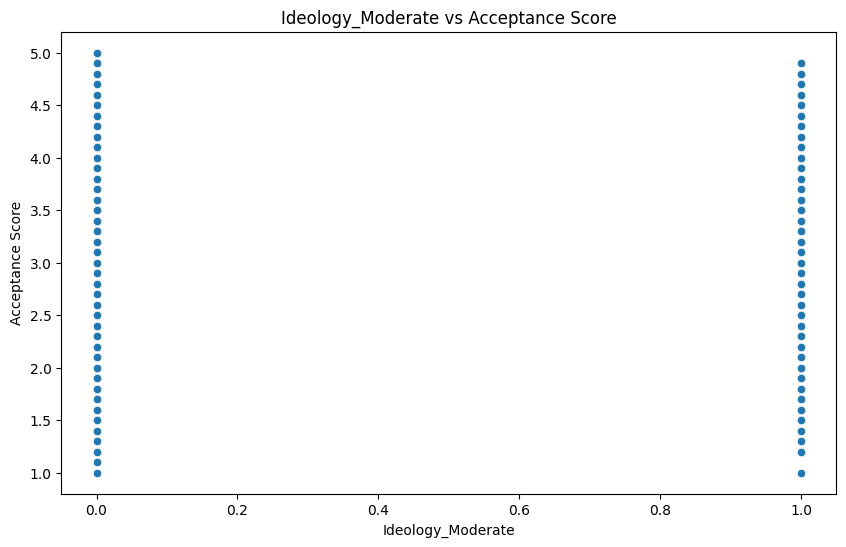

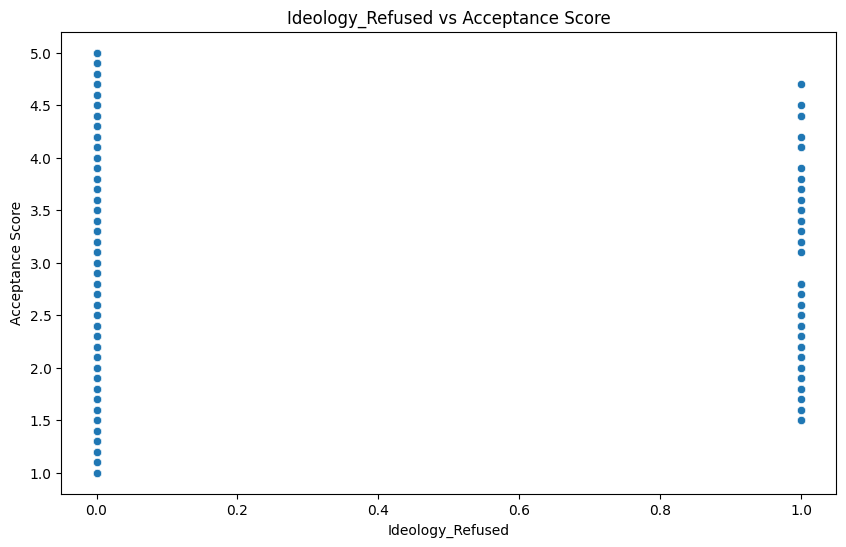

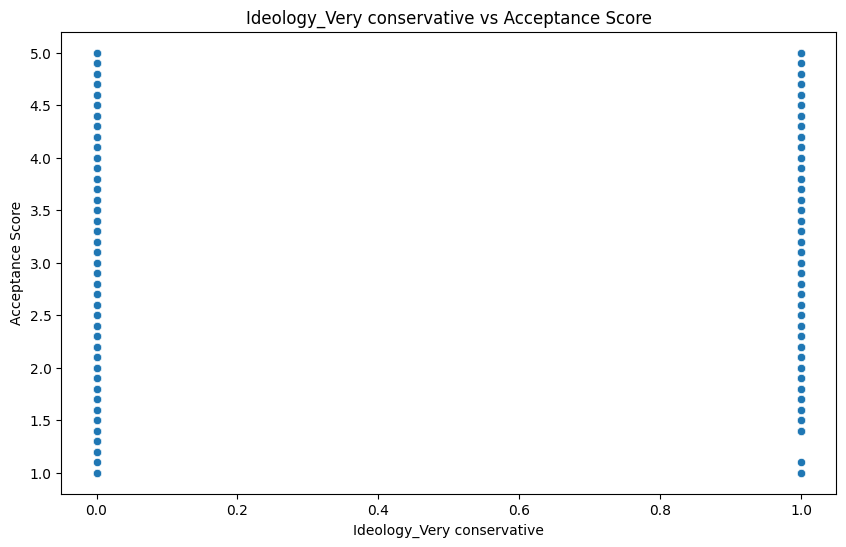

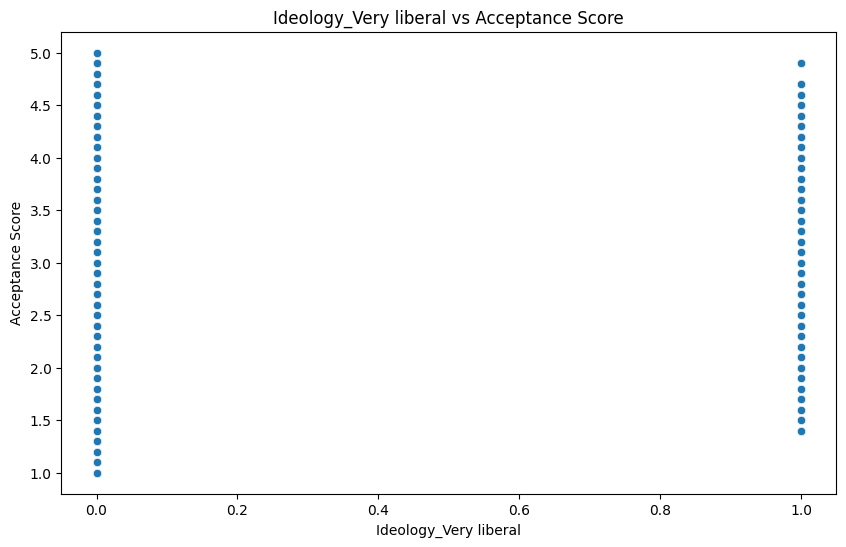

In [175]:
for column in df_encoded.columns:
    if column != 'Acceptance_Score':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=column, y='Acceptance_Score', data=df_encoded)
        plt.title(f'{column} vs Acceptance Score')
        plt.xlabel(column)
        plt.ylabel('Acceptance Score')
        plt.show()

In [184]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [185]:
# 单因素ANOVA测试：比较Demographic_Region对Acceptance_Score的影响
model = smf.ols('Acceptance_Score ~ C(Demographic_Region)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 单因素ANOVA测试：比较Gender对Acceptance_Score的影响
model = smf.ols('Acceptance_Score ~ C(Gender)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 单因素ANOVA测试：比较Education_Degree对Acceptance_Score的影响
model = smf.ols('Acceptance_Score ~ C(Education_Degree)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 单因素ANOVA测试：比较Ethnicity对Acceptance_Score的影响
model = smf.ols('Acceptance_Score ~ C(Ethnicity)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 单因素ANOVA测试：比较Ideology对Acceptance_Score的影响
model = smf.ols('Acceptance_Score ~ C(Ideology)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


model = smf.ols('Acceptance_Score ~ C(Age)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

model = smf.ols('Acceptance_Score ~ C(Income_Level)', data=model_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df         F   PR(>F)
C(Demographic_Region)    20.455633     8.0  2.993261  0.00238
Residual               4154.154737  4863.0       NaN      NaN
                sum_sq      df          F        PR(>F)
C(Gender)   184.925663     2.0  112.84138  1.245773e-48
Residual   3989.684707  4869.0        NaN           NaN
                          sum_sq      df          F        PR(>F)
C(Education_Degree)   199.879588     6.0  40.774845  1.015653e-48
Residual             3974.730781  4865.0        NaN           NaN
                   sum_sq      df          F        PR(>F)
C(Ethnicity)    53.768511     5.0  12.698258  2.775477e-12
Residual      4120.841858  4866.0        NaN           NaN
                  sum_sq      df        F        PR(>F)
C(Ideology)   226.180676     5.0  55.7485  1.597063e-56
Residual     3948.429694  4866.0      NaN           NaN
               sum_sq      df          F        PR(>F)
C(Age)     121.066809     4.0  36.340559  5.6485

In [159]:
# Independent variables (input): 'Demographic_Region', 'Age', 'Gender', 'Education_Degree', 'Ethnicity', 'Income_Level', 'Ideology'
# Dependent variable (output): 'Acceptance_Score'

In [160]:
# linear regression + ANOVA test

# Decision Tree regression

# Random Forest 

